###Reads several outputs from ana_climatology.ipynb to make some correlations for VPR

In [131]:
import sys
sys.path.append('/home/silke/Python/radarlecture2016/radarmeteorology/common')
import warnings
warnings.filterwarnings('ignore')
from helper import create_filename
import pandas as pd 
import numpy as np
import datetime as dt
import glob
from scipy import stats
import wradlib as wrl
from scipy import ndimage
import math
import matplotlib.pyplot as pl
import matplotlib as mpl
from matplotlib import colors
try:
    get_ipython().magic("matplotlib inline")
except:
    pl.ion()
import os
import glob
import scipy
from pandas import rolling_median
import pandas as pd
from scipy.stats import linregress
import numpy.ma as ma
from numpy import asarray as ar
import datetime as dt
from datetime import timedelta
from matplotlib.dates import DayLocator, HourLocator, MinuteLocator,DateFormatter, drange
from scipy.stats.stats import pearsonr
from scipy.signal import correlate
import matplotlib

In [132]:
#%pylab

In [133]:
def get_miub_cmap():
    startcolor = 'white'  # a dark olive
    color1 = '#8ec7ff'#'cyan'    # a bright yellow
    color2 = 'dodgerblue'
    color3 = 'darkgreen'
    #color3 = 'lime'
    color4 = 'yellow'
    color5 = 'darkorange'
    color6 = 'red'
    #color7 = 'purple'
    endcolor = 'darkmagenta'    # medium dark red
    colors = [startcolor, color1, color2, color3, color4, color5, color6, endcolor]
    return mpl.colors.LinearSegmentedColormap.from_list('miub1',colors)


In [134]:
def add_cbar(im, ticks, norm):
    cbar = pl.colorbar(im[-1], norm=norm, boundaries=ticks, pad=0.05)
    cbar.locator = mpl.ticker.FixedLocator(ticks)
    cbar.update_ticks()
    return cbar

In [135]:
def get_norm(ticks):
    cmap = get_miub_cmap()
    norm = mpl.colors.BoundaryNorm(ticks, cmap.N)
    return norm

In [136]:
def shift(xs, n):
    if n >= 0:
        return np.r_[np.full(n, np.nan), xs[:-n]]
    else:
        return np.r_[xs[-n:], np.full(-n, np.nan)]

#Load output files

In [137]:
datepath="/home/silke/Python/projects/climatology/"
outputf = sorted(glob.glob(datepath + "out*.txt"))
dates=range(len(outputf))
print('outputf',outputf[3])
for l in range(len(outputf)):
    dates[l]=outputf[l][44:54]

###Versteh Fehler nicht, lasse erstmal 2013-05-29 weg
##Ich glaub 2015-04-02 gibts keine Wippeninfo, ebenfalls weg:'2015-05-03', '2015-05-29', '2015-06-02','2015-06-13', '2015-06-23', '2015-07-13','2015-07-26', 
#     '2015-08-08','2015-08-16', '2015-08-17', '2015-09-01','2015-09-16'
## Ich glaub 2015-04-04 ist die ML zu niedrig, ebenfalls weg
##'2016-01-10','2016-01-11', '2016-01-13'
##Fast das komplette 2015 hat keine Wippeninfo!!
##high rainrates raus '2013-07-03', '2014-05-06', '2014-08-26',
##nearly high rain rates '2015-06-13','2015-08-08','2015-09-01',
datesredu=['2013-04-12','2014-05-06','2014-05-27','2014-06-28','2014-07-08','2014-07-09','2014-10-07','2014-10-08','2014-11-04','2014-12-12',
       '2015-03-29','2015-04-02','2015-05-03',
       '2015-06-02', '2015-06-23', '2015-08-04','2015-08-17','2015-08-27','2015-09-01','2015-09-13', 
       '2015-09-16','2015-09-22','2015-10-05','2015-11-17', '2015-11-19', '2015-11-29', '2015-12-04', 
       '2015-12-08','2015-12-09',
       '2015-12-11', '2015-12-16', '2015-12-22', '2015-12-25','2016-01-07','2016-01-30','2016-09-04']
dates=['2013-04-12','2013-07-03','2014-05-06','2014-05-27','2014-06-28','2014-07-05','2014-07-08',
       '2014-07-09','2014-08-26','2014-10-07','2014-10-08','2014-10-09','2014-10-15','2014-11-04','2014-12-12',     
       '2014-11-16','2014-12-19','2015-01-02','2015-01-08','2015-02-27','2015-03-29','2015-04-02','2015-05-03','2015-05-29',
       '2015-06-02', '2015-06-13','2015-06-22','2015-06-23', '2015-07-13','2015-08-04','2015-08-08','2015-08-17',
       '2015-08-27','2015-09-01','2015-09-13', 
       '2015-09-16','2015-09-22','2015-10-05','2015-11-06','2015-11-17', '2015-11-19', '2015-11-20',
       '2015-11-29', '2015-12-08','2015-12-09',
       '2015-12-11', '2015-12-16', '2015-12-22', '2015-12-25','2016-01-02','2016-01-07','2016-09-04']

dates_low=['2013-04-12', '2015-04-02', '2015-04-04','2015-05-03', '2015-05-29',
       '2015-06-02', '2015-06-23', '2015-07-13',
       '2015-08-17', '2015-09-16',
       '2015-10-05','2015-11-06','2015-11-17', '2015-11-19', '2015-11-20',
       '2015-11-29', '2015-12-08','2015-12-09','2015-12-11', 
       '2015-12-16','2015-12-22', '2015-12-25','2016-01-02', '2016-01-07']
print(dates)


('outputf', '/home/silke/Python/projects/climatology/out_2014-05-27.txt')
['2013-04-12', '2013-07-03', '2014-05-06', '2014-05-27', '2014-06-28', '2014-07-05', '2014-07-08', '2014-07-09', '2014-08-26', '2014-10-07', '2014-10-08', '2014-10-09', '2014-10-15', '2014-11-04', '2014-12-12', '2014-11-16', '2014-12-19', '2015-01-02', '2015-01-08', '2015-02-27', '2015-03-29', '2015-04-02', '2015-05-03', '2015-05-29', '2015-06-02', '2015-06-13', '2015-06-22', '2015-06-23', '2015-07-13', '2015-08-04', '2015-08-08', '2015-08-17', '2015-08-27', '2015-09-01', '2015-09-13', '2015-09-16', '2015-09-22', '2015-10-05', '2015-11-06', '2015-11-17', '2015-11-19', '2015-11-20', '2015-11-29', '2015-12-08', '2015-12-09', '2015-12-11', '2015-12-16', '2015-12-22', '2015-12-25', '2016-01-02', '2016-01-07', '2016-09-04']


# Read the output files

In [138]:
def runningMean(x, N):
    y = np.zeros((len(x)-N+1,))
    for ctr in range(len(x)-N+1):
         y[ctr] = np.sum(x[ctr:(ctr+N)])
    return y/N

a=[3,5,np.nan, np.nan,7,3,7,9,45,232,5,7,9,0]
print(runningMean(a,2))

[  4.    nan   nan   nan   5.    5.    8.   27.  138.5 118.5   6.    8.
   4.5]


In [139]:
def scatterdensity(xx,yy,binsnxny):
    ###Versuch mit Scatter Density Plot
    #Set bin numbers in both axes
    nxbins = binsnxny
    nybins = binsnxny

    #Set the cutoff for resolving the individual points
    minperbin = 1
    x=xx
    y=yy
    mask= np.isnan(x) | np.isnan(y)
    x=x[~mask]
    y=y[~mask]
    #Make the density histrogram
    H, yedges, xedges = np.histogram2d(y,x,bins=(nybins,nxbins))
    #Reorient the axes
    H =  H[::-1]

    extent = [xedges[0],xedges[-1],yedges[0],yedges[-1]]
    
    #Compute all bins where the density plot value is below (or equal to) the threshold
    lowxleftedges = [[xedges[i] for j in range(len(H[:,i])) if H[j,i] <= minperbin] for i in range(len(H[0,:]))] 
    lowxrightedges = [[xedges[i+1] for j in range(len(H[:,i])) if H[j,i] <= minperbin] for i in range(len(H[0,:]))] 
    lowyleftedges = [[yedges[-(j+2)] for j in range(len(H[:,i])) if H[j,i] <= minperbin] for i in range(len(H[0,:]))]
    lowyrightedges = [[yedges[-(j+1)] for j in range(len(H[:,i])) if H[j,i] <= minperbin] for i in range(len(H[0,:]))]

    #Flatten and convert to numpy array
    lowxleftedges = np.asarray([item for sublist in lowxleftedges for item in sublist])
    lowxrightedges = np.asarray([item for sublist in lowxrightedges for item in sublist])
    lowyleftedges = np.asarray([item for sublist in lowyleftedges for item in sublist])
    lowyrightedges = np.asarray([item for sublist in lowyrightedges for item in sublist])

    #Find all points that lie in these regions
    lowdatax = [[x[i] for j in range(len(lowxleftedges)) if lowxleftedges[j] <= x[i] and x[i] <= lowxrightedges[j] and lowyleftedges[j] <= y[i] and y[i] <= lowyrightedges[j]] for i in range(len(x))]
    lowdatay = [[y[i] for j in range(len(lowyleftedges)) if lowxleftedges[j] <= x[i] and x[i] <= lowxrightedges[j] and lowyleftedges[j] <= y[i] and y[i] <= lowyrightedges[j]] for i in range(len(y))]

    #Flatten and convert into numpy array
    lowdatax = np.asarray([item for sublist in lowdatax for item in sublist])
    lowdatay = np.asarray([item for sublist in lowdatay for item in sublist])
    return H, extent, minperbin
    

In [140]:
def savitzky_golay(y, window_size, order, deriv=0):
    r"""Smooth (and optionally differentiate) data with a Savitzky-Golay filter.
    The Savitzky-Golay filter removes high frequency noise from data.
    It has the advantage of preserving the original shape and
    features of the signal better than other types of filtering
    approaches, such as moving averages techhniques.
    
    This code has been taken from http://www.scipy.org/Cookbook/SavitzkyGolay
    Parameters
    ----------
    y : array_like, shape (N,)
        the values of the time history of the signal.
    window_size : int
        the length of the window. Must be an odd integer number.
    order : int
        the order of the polynomial used in the filtering.
        Must be less then `window_size` - 1.
    deriv: int
        the order of the derivative to compute (default = 0 means only smoothing)
    Returns
    -------
    ys : ndarray, shape (N)
        the smoothed signal (or it's n-th derivative).
    Notes
    -----
    The Savitzky-Golay is a type of low-pass filter, particularly
    suited for smoothing noisy data. The main idea behind this
    approach is to make for each point a least-square fit with a
    polynomial of high order over a odd-sized window centered at
    the point.
    Examples
    --------
    t = np.linspace(-4, 4, 500)
    y = np.exp( -t**2 ) + np.random.normal(0, 0.05, t.shape)
    ysg = savitzky_golay(y, window_size=31, order=4)
    import matplotlib.pyplot as plt
    plt.plot(t, y, label='Noisy signal')
    plt.plot(t, np.exp(-t**2), 'k', lw=1.5, label='Original signal')
    plt.plot(t, ysg, 'r', label='Filtered signal')
    plt.legend()
    plt.savefig('images/golay.png')
    #plt.show()
    References
    ----------
    .. [1] A. Savitzky, M. J. E. Golay, Smoothing and Differentiation of
       Data by Simplified Least Squares Procedures. Analytical
       Chemistry, 1964, 36 (8), pp 1627-1639.
    .. [2] Numerical Recipes 3rd Edition: The Art of Scientific Computing
       W.H. Press, S.A. Teukolsky, W.T. Vetterling, B.P. Flannery
       Cambridge University Press ISBN-13: 9780521880688
    """
    try:
        window_size = np.abs(np.int(window_size))
        order = np.abs(np.int(order))
    except ValueError, msg:
        raise ValueError("window_size and order have to be of type int")
    if window_size % 2 != 1 or window_size < 1:
        raise TypeError("window_size size must be a positive odd number")
    if window_size < order + 2:
        raise TypeError("window_size is too small for the polynomials order")
    order_range = range(order+1)
    half_window = (window_size -1) // 2
    # precompute coefficients
    b = np.mat([[k**i for i in order_range] for k in range(-half_window, half_window+1)])
    m = np.linalg.pinv(b).A[deriv]
    # pad the signal at the extremes with
    # values taken from the signal itself
    firstvals = y[0] - np.abs( y[1:half_window+1][::-1] - y[0] )
    lastvals = y[-1] + np.abs(y[-half_window-1:-1][::-1] - y[-1])
    y = np.concatenate((firstvals, y, lastvals))
    return np.convolve( m, y, mode='valid')

In [141]:
#Create the colormap:
halfpurples = {'blue': [(0.0,1.0,1.0),(0.000001, 0.78431373834609985, 0.78431373834609985),
(0.25, 0.729411780834198, 0.729411780834198), (0.5,
0.63921570777893066, 0.63921570777893066), (0.75,
0.56078433990478516, 0.56078433990478516), (1.0, 0.49019607901573181,
0.49019607901573181)],

    'green': [(0.0,1.0,1.0),(0.000001,
    0.60392159223556519, 0.60392159223556519), (0.25,
    0.49019607901573181, 0.49019607901573181), (0.5,
    0.31764706969261169, 0.31764706969261169), (0.75,
    0.15294118225574493, 0.15294118225574493), (1.0, 0.0, 0.0)],

    'red': [(0.0,1.0,1.0),(0.000001,
    0.61960786581039429, 0.61960786581039429), (0.25,
    0.50196081399917603, 0.50196081399917603), (0.5,
    0.41568627953529358, 0.41568627953529358), (0.75,
    0.32941177487373352, 0.32941177487373352), (1.0,
    0.24705882370471954, 0.24705882370471954)]} 

halfpurplecmap = mpl.colors.LinearSegmentedColormap('halfpurples',halfpurples,256)

#First try with pearson

In [142]:
## reads the output of climatology_qvp-> out*.txt files 
ML_b_clim=[]
ML_t_clim=[]
ML_th_clim=[]
Kdp_ML_clim=[]
D_ML_clim=[]
Dh_clim=[]
Zh_ML_clim=[]
Zhh_clim=[]
Zdr_ML_clim=[]
Zdrh_clim=[]
R_ML_clim=[]
R_S_clim=[]
Rh_clim=[]
Kdp_D_clim=[]
Zdr_D_clim=[]
Zh_D_clim=[]
Zh_rain_clim=[]
Zh_S_clim=[]
Zdr_S_clim=[]
St_clim=[]
Zh_snow_clim=[]
Zdr_rain_clim=[]
Zdr_snow_clim=[]
R_rain_clim=[]
R_snow_clim=[]
#for the overall retrieval
Kdp_D_new_clim=[]
Zh_D_new_clim=[]
St_h_new_clim=[]
D_ML_new_clim=[]
Zdr_D_new_clim=[]
Rmlb_clim=[]
Rmlt_clim=[]


#for k in range(len(outputf)):

for k in range(len(dates)):
#for k in range(0,15):    
    #file=outputf[k]
    file= datepath + "out_" + dates[k] + ".txt"
    
    print('file',file)
    #Uhrzeit in 5min Schritten
    Time=[]
    # neu nach RHOhv definierten ML_Unter- und Oberkanten
    Rmlb=[]
    Rmlt=[]
    #Hoehe Unterkante ML
    ML_b=[]
    #Hoehe Oberkante ML
    ML_t=[]
    #Dicke der ML
    ML_th=[]
    #Kdp in der ML
    Kdp_ML=[]
    #Maximales PHI in ML
    Phimax=[]
    #Delta in ML
    D_ML=[]
    # Betrachtetes Hoehenintervall für Kdp_ML Schaetzung
    Dh=[]
    #Zh in ML
    Zh_ML=[]
    #Hoehe des Zh Maximums in ML
    Zhh=[]
    #Zdr in ML
    Zdr_ML=[]
    #Hoehe des Zdr Maximums in ML
    Zdrh=[]
    #RHOhv Minimum in ML
    R_ML=[]
    #Rhohv at the surface
    R_S=[]
    #Hoehe des RHOhv Minimums
    Rh=[]
    #KDP in der DGL
    Kdp_D=[]
    #ZDR in der DGL
    Zdr_D=[]
    #Zh in der DGL
    Zh_D=[]
    #Zh in rain 150m below ML_bottom
    Zh_rain=[]
    #Zh in snow above ML_top
    Zh_snow=[]
    #Zdr in rain 150m below ML_bottom
    Zdr_rain=[]
    #Zdr in snow above ML_top
    Zdr_snow=[]
    #RHohv in rain 150m below ML_bottom
    R_rain=[]
    #Rhohv in snow above ML_top
    R_snow=[]
    #Zh am Boden
    Zh_S=[]
    #Zdr am Boden
    Zdr_S=[]
    #NN der ersten Raingaugestation
    St1=[]
    #NN der zweiten Raingaugestation
    St2=[]
    #NN der dritten Raingaugestation
    St3=[]
    St4=[]
    St5=[]
    Rmlb=[]
    Rmlt=[]

    
    #in_file= open(outputf[k],"r")
    in_file= open(datepath + "out_" + dates[k] + ".txt","r")
    data =np.loadtxt(in_file, skiprows=1, usecols=range(1,29,1), dtype = 'f4')
    in_file.close()
    
    in_file2= open(datepath + "FZout_" + dates[k] + ".txt","r")
    data2 =np.loadtxt(in_file2, skiprows=1, usecols=range(1,13,1), dtype = 'f4')
    in_file2.close()
    #in_file= open(outputf[k],"r")
    in_file= open(datepath + "out_" + dates[k] + ".txt","r")
    #Time =np.loadtxt(in_file, skiprows=1, usecols=(0), dtype = np.dtype(dtype))
    Time =np.loadtxt(in_file, skiprows=1, usecols=(0), dtype = 'S5')
    
    for l in range(len(Time)):
        Time[l]=Time[l][0:5]
        #St=max(St1,St2,St3)
        #print(Time[l],l)
    
    dates0 = dt.datetime.strptime(dates[k]+Time[0], '%Y-%m-%d%H:%M')
    dates1 = dt.datetime.strptime(dates[k]+Time[-1], '%Y-%m-%d%H:%M')
    deltat = dates1-dates0
    #print(dates0, dates1)
    Time=np.arange(dates0, dates1 + timedelta(minutes=5), timedelta(minutes=5))
    #print(Time)
    ML_b=data[:,0]
    ML_b_clim.extend(ML_b)
    ML_t=data[:,1]
    ML_t_clim.extend(ML_t)
    ML_th=data[:,2]
    ML_th_clim.extend(ML_th)
    Kdp_ML=data[:,3]
    Kdp_ML_clim.extend(Kdp_ML)
    Phimax=data[:,4]
    
    D_ML=data[:,5]
    D_ML_clim.extend(D_ML)
    
    Dh=data[:,6]
    Dh_clim.extend(Dh)
    
    Zh_ML=data[:,7]
    Zh_ML_clim.extend(Zh_ML)
    
    Zh_snow=data2[:,5]
    Zh_snow_clim.extend(Zh_snow)
    
    Zdr_rain=data2[:,7]
    Zdr_rain_clim.extend(Zdr_rain)
    
    Zdr_snow=data2[:,8]
    Zdr_snow_clim.extend(Zdr_snow)
    
    R_rain=data2[:,10]
    R_rain_clim.extend(R_rain)
    
    R_snow=data2[:,11]
    R_snow_clim.extend(R_snow)
    
    Zhh=data[:,8]
    #print('Zhh',Zhh)
    Zhh_clim.extend(Zhh)
    Zdr_ML=data[:,9]
    Zdr_ML_clim.extend(Zdr_ML)
    Zdrh=data[:,10]
    #print('Zdrh',Zdrh)
    Zdrh_clim.extend(Zdrh)
    
    R_ML=data[:,11]
    R_ML_clim.extend(R_ML)
    
    Rh=data[:,12]
    Rh_clim.extend(Rh)
    Kdp_D=data[:,13]
    Kdp_D_clim.extend(Kdp_D)
    Zdr_D=data[:,14]
    Zdr_D_clim.extend(Zdr_D)
    Zh_D=data[:,15]
    Zh_D_clim.extend(Zh_D)
    Zh_rain=data[:,16]
    Zh_rain_clim.extend(Zh_rain)
    Zh_S=data[:,17]
    Zh_S_clim.extend(Zh_S)
    Zdr_S=data[:,18]
    Zdr_S_clim.extend(Zdr_S)
    R_S=data[:,19]
    R_S_clim.extend(R_S)
    St1=data[:,20]
    St2=data[:,21]
    St3=data[:,22]
    St4=data[:,23]
    St5=data[:,24]
    Rmlb=data[:,26]
    
    Rmlb_clim.extend(Rmlb)
    Rmlt=data[:,27]
    Rmlt_clim.extend(Rmlt)
    ## Single event statistics

     
    #St=(St1+St2+St3+St4+St5)/5.
    St= (St1+St2)/2.
    St_clim.extend(St)
    #St_clim.extend(St)
    St_all=(St1+St2+St3+St4+St5)/5.
    
#print("Rmlt_clim",Rmlt_clim)
#print("Rmlb_clim",Rmlb_clim)

('file', '/home/silke/Python/projects/climatology/out_2013-04-12.txt')
('file', '/home/silke/Python/projects/climatology/out_2013-07-03.txt')
('file', '/home/silke/Python/projects/climatology/out_2014-05-06.txt')
('file', '/home/silke/Python/projects/climatology/out_2014-05-27.txt')
('file', '/home/silke/Python/projects/climatology/out_2014-06-28.txt')
('file', '/home/silke/Python/projects/climatology/out_2014-07-05.txt')
('file', '/home/silke/Python/projects/climatology/out_2014-07-08.txt')
('file', '/home/silke/Python/projects/climatology/out_2014-07-09.txt')
('file', '/home/silke/Python/projects/climatology/out_2014-08-26.txt')
('file', '/home/silke/Python/projects/climatology/out_2014-10-07.txt')
('file', '/home/silke/Python/projects/climatology/out_2014-10-08.txt')
('file', '/home/silke/Python/projects/climatology/out_2014-10-09.txt')
('file', '/home/silke/Python/projects/climatology/out_2014-10-15.txt')
('file', '/home/silke/Python/projects/climatology/out_2014-11-04.txt')
('file

#Doing some correlations relevant for VPR

# First Z_ML-Z_S with RHO_ML

('Layerstatstics,mean,stdev', 1.9128538, 0.78120905)
('Layerstatstics,mean,stdev', 1.9246218, 0.77944916)
('DIFFstatstics, mean, stdev', 2.1731670035546684, 2.6721495172429837)
('DIFFstatstics snow, mean, stdev', 3.8427166070192786, 2.2661315187388946)
('Zhdiff2statstics, mean, stdev', 7.810332729887561, 1.8207531267014063)
('Zdrdiff2statstics, mean, stdev', 1.0613267966209545, 0.30072186878049545)


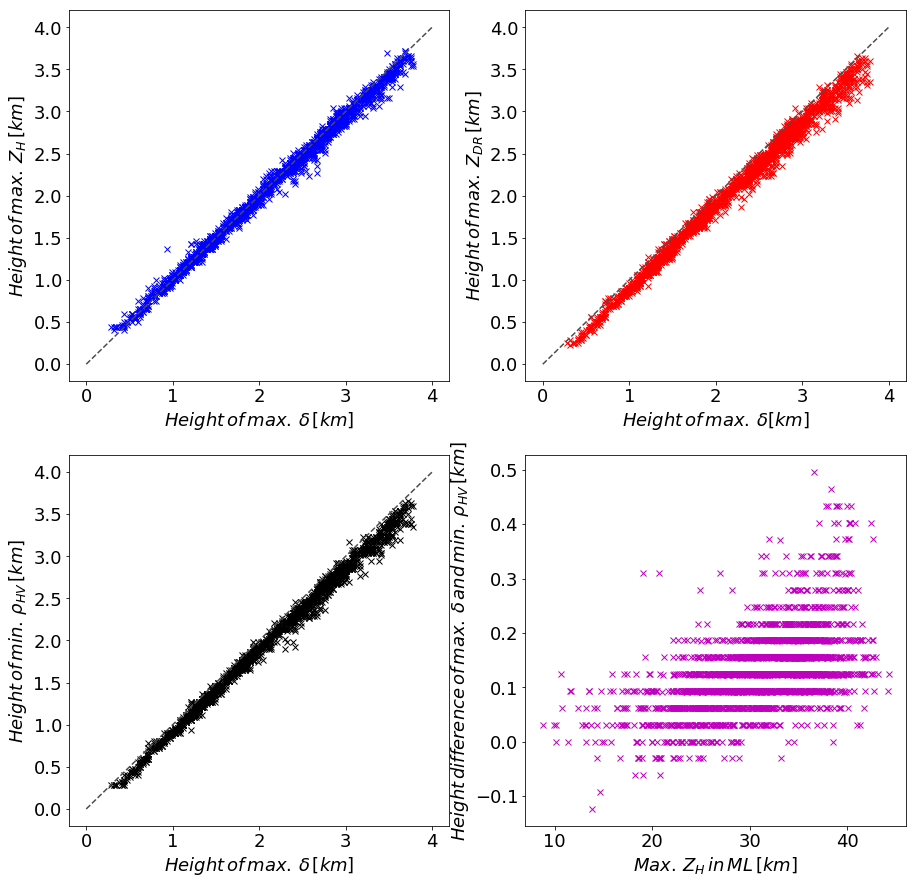

('res=', array([18.88888889, 46.4       ]))
('res[1] + res[0]', 46.39999999999999, 18.888888888888903)
('R', array([-1.6       , -1.51578947, -1.43157895, -1.34736842, -1.26315789,
       -1.17894737, -1.09473684, -1.01052632, -0.92631579, -0.84210526,
       -0.75789474, -0.67368421, -0.58947368, -0.50526316, -0.42105263,
       -0.33684211, -0.25263158, -0.16842105, -0.08421053,  0.        ]))
('zzr=', array([16.17777778, 17.76842105, 19.35906433, 20.9497076 , 22.54035088,
       24.13099415, 25.72163743, 27.3122807 , 28.90292398, 30.49356725,
       32.08421053, 33.6748538 , 35.26549708, 36.85614035, 38.44678363,
       40.0374269 , 41.62807018, 43.21871345, 44.80935673, 46.4       ]))


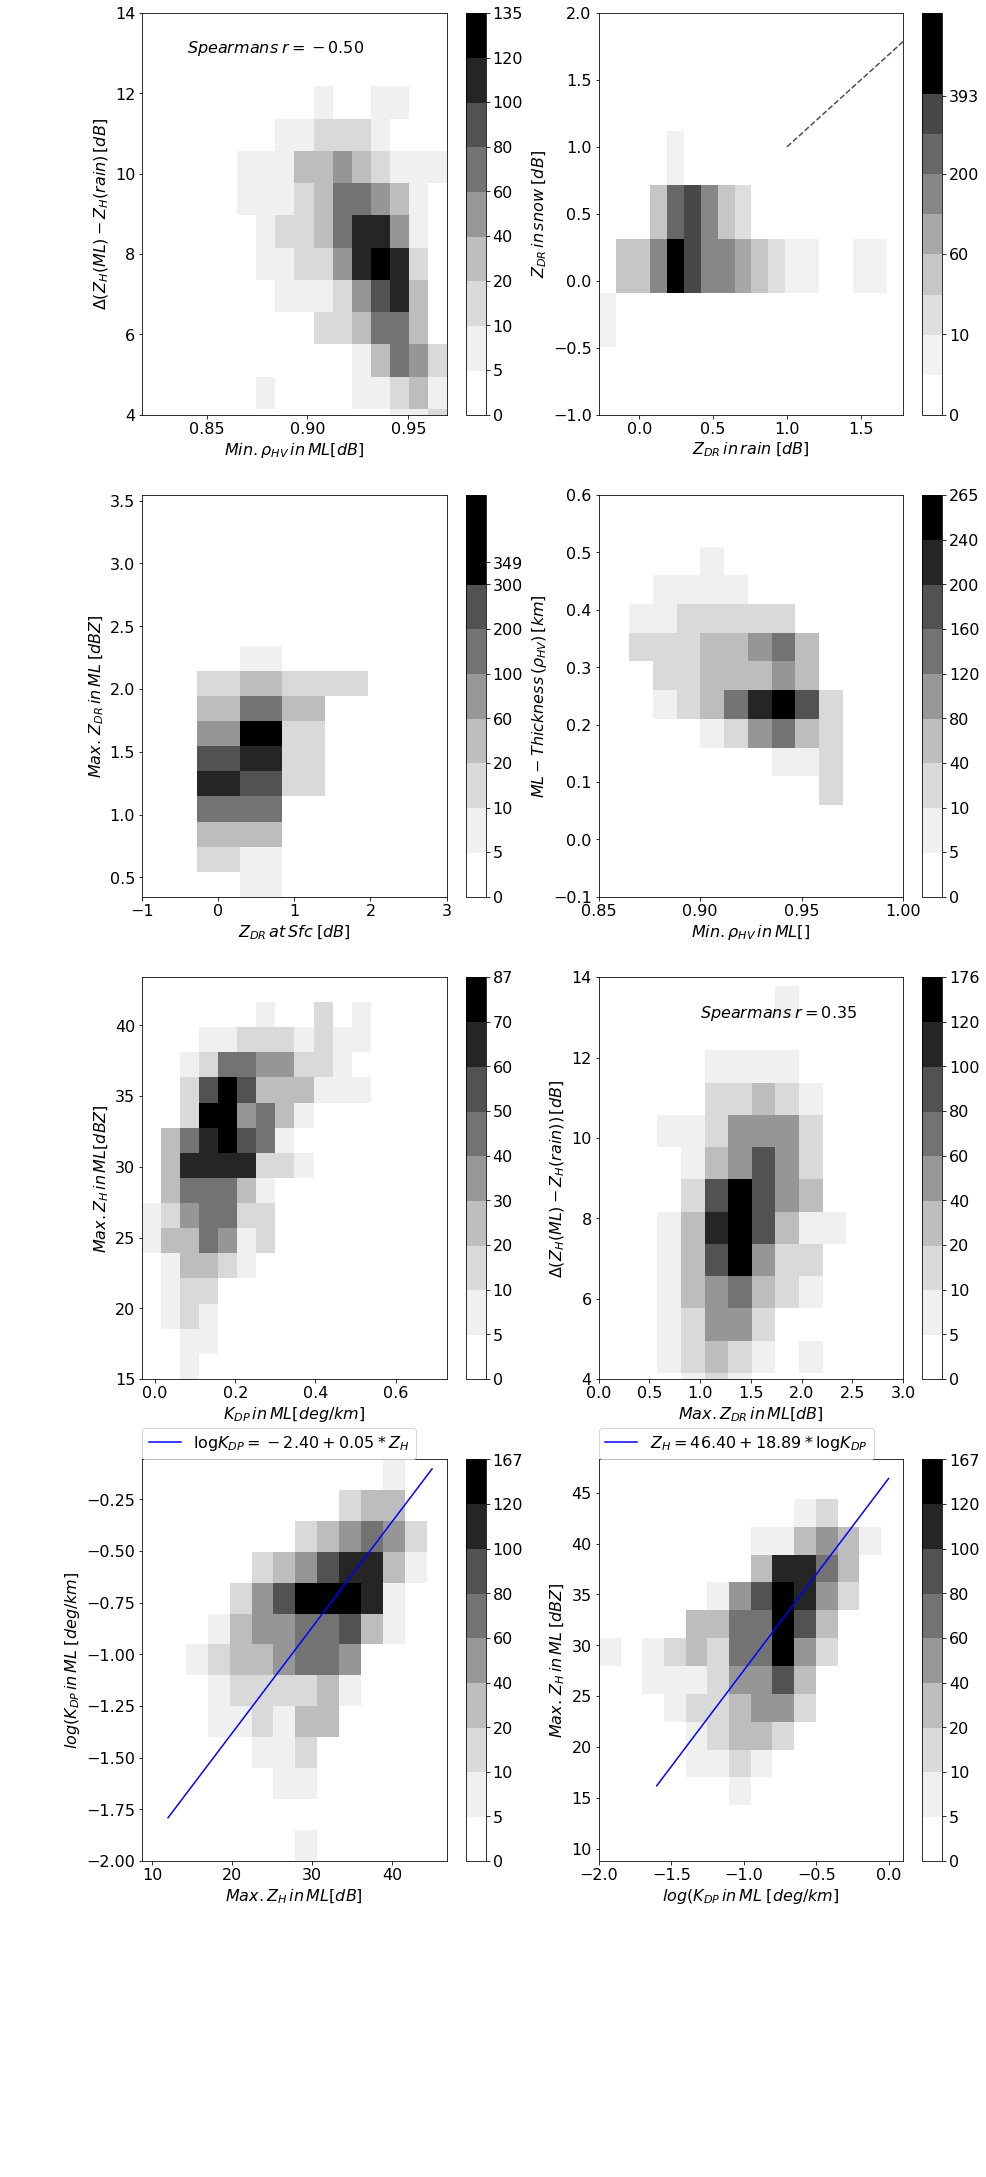

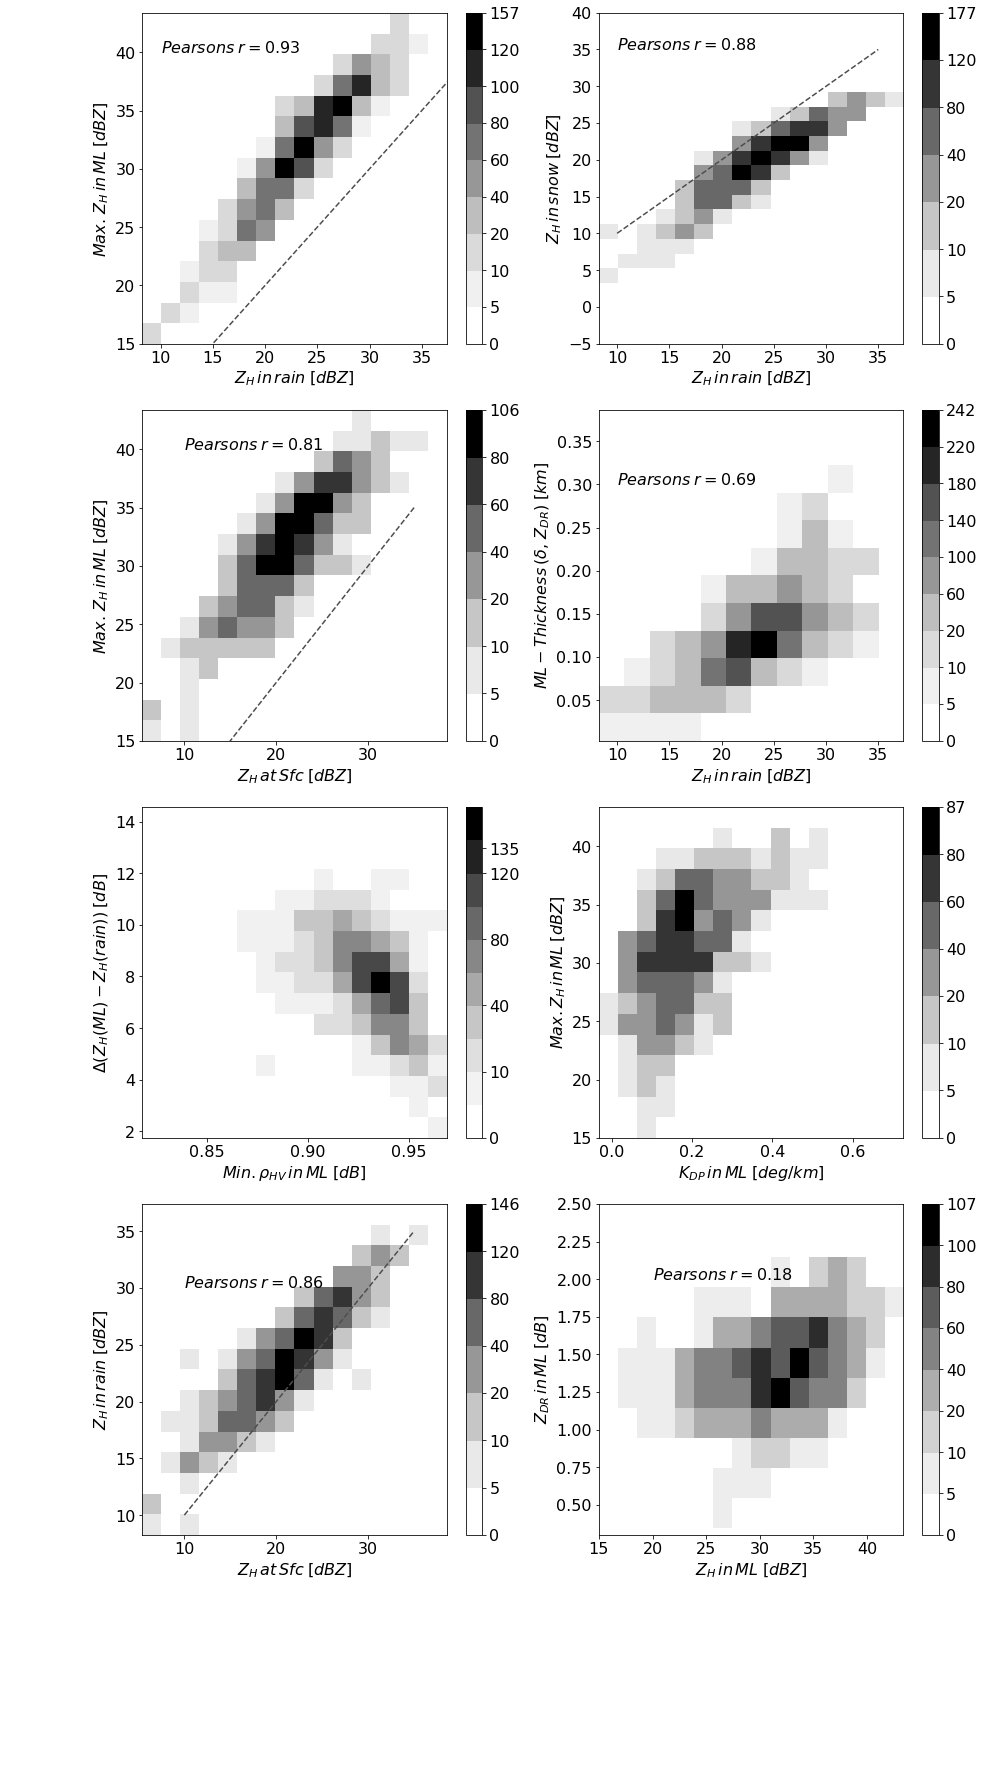

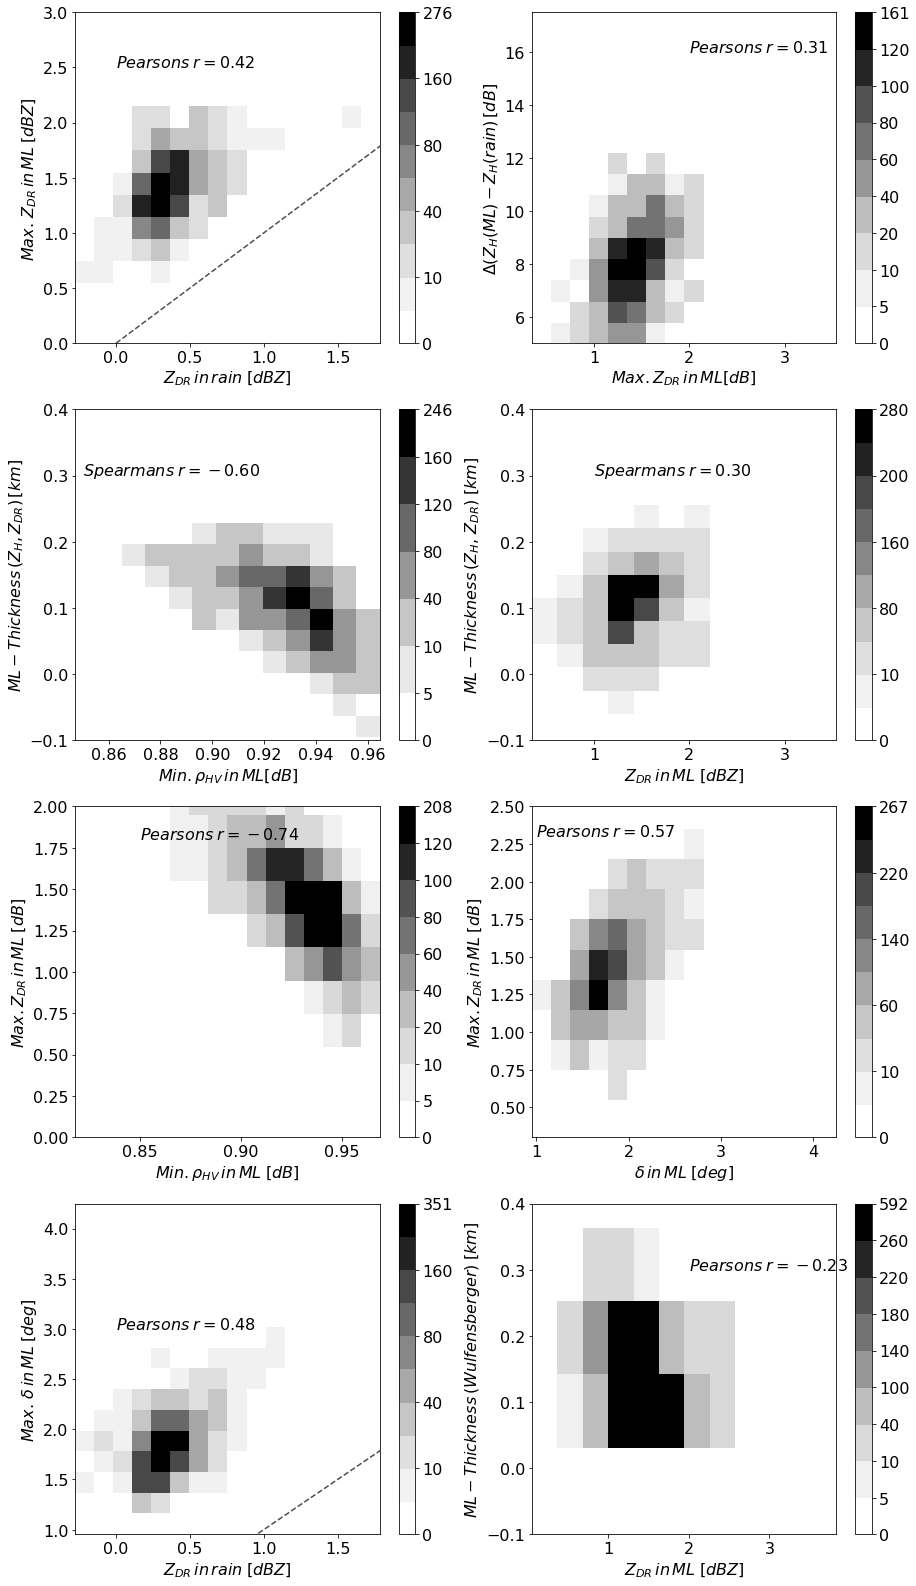

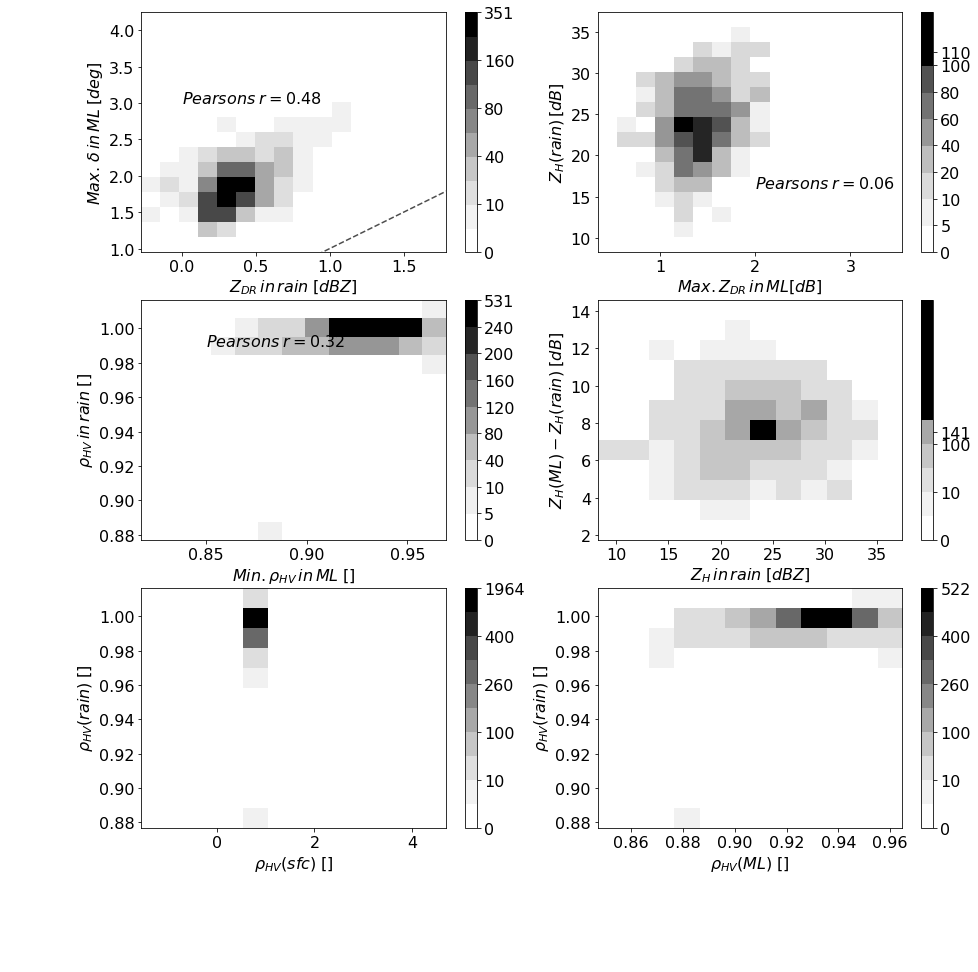

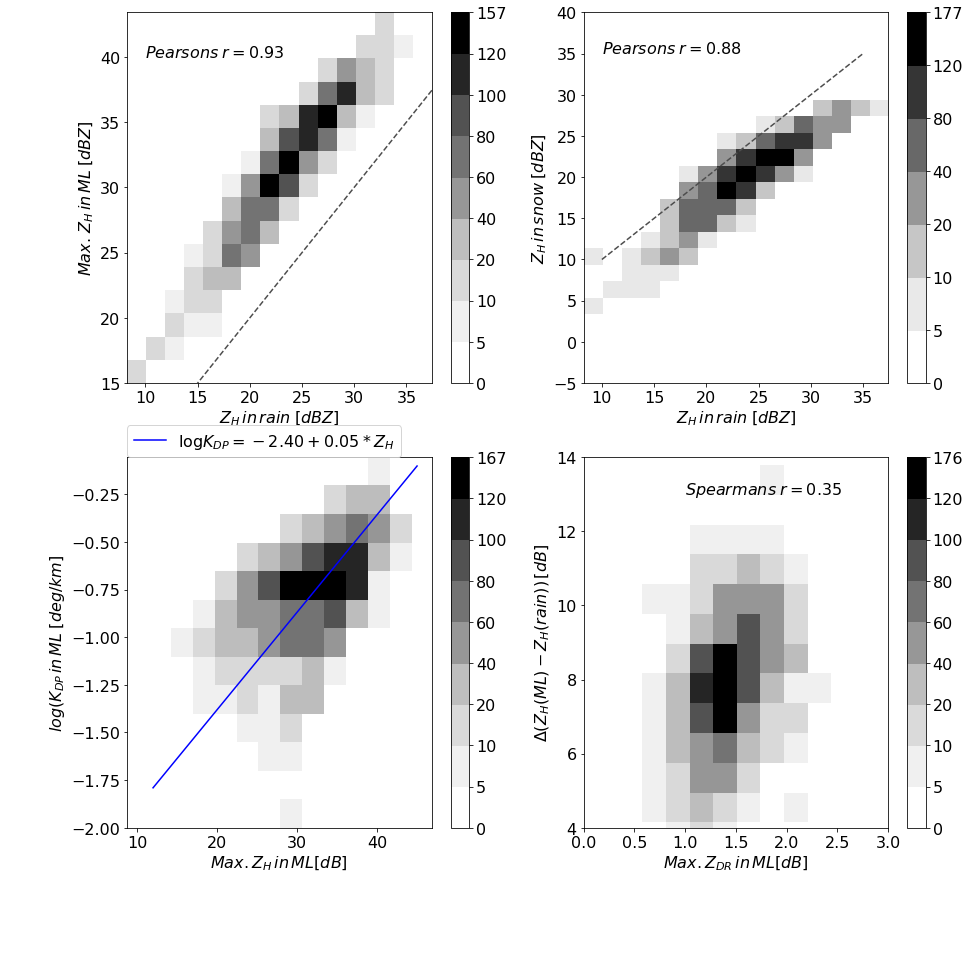

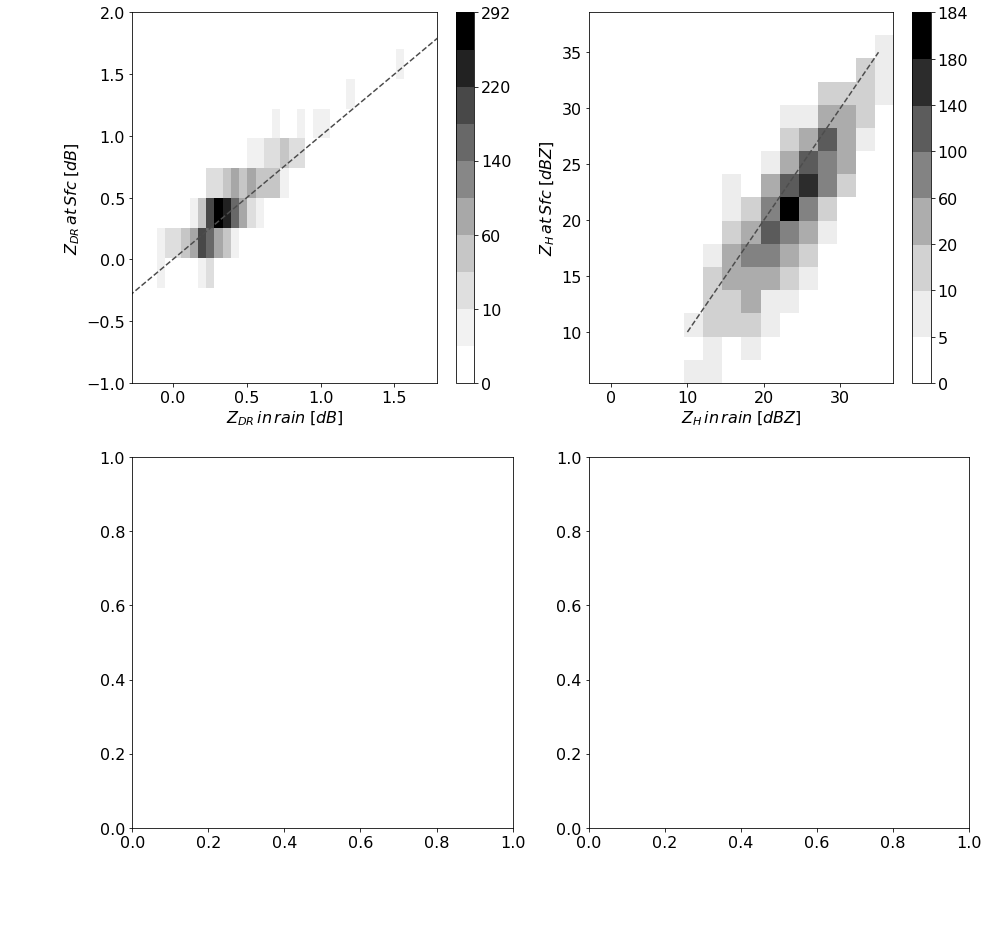

np.nanmean(Zh_rain_clim-Zh_Ss_clim),np.nanmean(Zh_ML_clim-Zh_rain_clim),np.nanmean(Zh_snows_clim-Zh_rain_clim) 
(2.226312783852886, 7.700206, -3.895862387317498)
np.nanmean(Zdr_rain_clim-Zdr_Ss_clim)
0.011991830651717274


In [143]:
Rmlb_clim=np.stack(Rmlb_clim)
Rmlt_clim=np.stack(Rmlt_clim)
#print("Rmlt_clim",Rmlt_clim)
#print("Rmlb_clim",Rmlb_clim)
ML_b_clim=np.stack(ML_b_clim)
Zh_ML_clim=np.stack(Zh_ML_clim)
St_clim=np.stack(St_clim)
Zh_MLs_clim=savitzky_golay(Zh_ML_clim, window_size=13, order=2, deriv=0)
Kdp_ML_clim=np.stack(Kdp_ML_clim)
Kdp_MLs_clim=savitzky_golay(Kdp_ML_clim, window_size=13, order=2, deriv=0)
Zh_S_clim=np.stack(Zh_S_clim)
Zh_Ss_clim=savitzky_golay(Zh_S_clim, window_size=13, order=2, deriv=0)
Zdr_S_clim=np.stack(Zdr_S_clim)
Zdr_Ss_clim=savitzky_golay(Zdr_S_clim, window_size=13, order=2, deriv=0)
Zh_rain_clim=np.stack(Zh_rain_clim)
Zh_rains_clim=savitzky_golay(Zh_rain_clim, window_size=13, order=2, deriv=0)
Zdr_rain_clim=np.stack(Zdr_rain_clim)
Zdr_rains_clim=savitzky_golay(Zdr_rain_clim, window_size=13, order=2, deriv=0)
Zdr_snow_clim=np.stack(Zdr_snow_clim)
Zdr_snows_clim=savitzky_golay(Zdr_snow_clim, window_size=13, order=2, deriv=0)

R_ML_clim=np.stack(R_ML_clim)
R_MLs_clim=savitzky_golay(R_ML_clim, window_size=13, order=2, deriv=0)
R_rain_clim=np.stack(R_rain_clim)
R_rains_clim=savitzky_golay(R_rain_clim, window_size=13, order=2, deriv=0)
R_S_clim=np.stack(R_S_clim)
R_Ss_clim=savitzky_golay(R_S_clim, window_size=13, order=2, deriv=0)
D_ML_clim=np.stack(D_ML_clim)
D_MLs_clim=savitzky_golay(D_ML_clim, window_size=13, order=2, deriv=0)
Zdr_ML_clim=np.stack(Zdr_ML_clim)
Zdr_MLs_clim=savitzky_golay(Zdr_ML_clim, window_size=13, order=2, deriv=0)
Zhh_clim=np.stack(Zhh_clim)
Zhhs_clim=savitzky_golay(Zhh_clim, window_size=13, order=2, deriv=0)
Dh_clim=np.stack(Dh_clim)
Dhs_clim=savitzky_golay(Dh_clim, window_size=13, order=2, deriv=0)
Zdrh_clim=np.stack(Zdrh_clim)
Zdrhs_clim=savitzky_golay(Zdrh_clim, window_size=13, order=2, deriv=0)
Rh_clim=np.stack(Rh_clim)
Rhs_clim=savitzky_golay(Rh_clim, window_size=13, order=2, deriv=0)
ML_th_clim=np.stack(ML_th_clim)
Zh_snow_clim=np.stack(Zh_snow_clim)
Zh_snows_clim=savitzky_golay(Zh_snow_clim, window_size=13, order=2, deriv=0)

missing= Zh_Ss_clim<5 | np.isnan(R_ML_clim)| np.isnan(Zdr_ML_clim)| np.isnan(Rmlb_clim)| np.isnan(Rmlt_clim)

#Zhdiff=Zhdiff[~missing]
#MLthick=MLthick[~missing]
Rmlb_clim=Rmlb_clim[~missing]
Rmlt_clim=Rmlt_clim[~missing]
ML_b_clim=ML_b_clim[~missing]
Rainlayermax=np.nanmax(ML_b_clim)
Rainlayermin=np.nanmin(ML_b_clim)
Rainlayermean=np.nanmean(ML_b_clim)
Rainlayerstdev=np.nanstd(ML_b_clim)
print('Layerstatstics,mean,stdev',Rainlayermean,Rainlayerstdev)
R_ML_clim=R_ML_clim[~missing]
R_MLs_clim=R_MLs_clim[~missing]
R_S_clim=R_S_clim[~missing]
R_Ss_clim=R_Ss_clim[~missing]
R_rains_clim=R_rains_clim[~missing]

Zdr_ML_clim=Zdr_ML_clim[~missing]
Zdr_MLs_clim=Zdr_MLs_clim[~missing]
Zh_ML_clim=Zh_ML_clim[~missing]
Zh_MLs_clim=Zh_MLs_clim[~missing]
Zh_Ss_clim=Zh_Ss_clim[~missing]
Zdr_S_clim=Zdr_S_clim[~missing]
Zdr_Ss_clim=Zdr_Ss_clim[~missing]
Zhh_clim=Zhh_clim[~missing]
Zhhs_clim=Zhhs_clim[~missing]
Dh_clim=Dh_clim[~missing]
Dhs_clim=Dhs_clim[~missing]
D_ML_clim=D_ML_clim[~missing]
D_MLs_clim=D_MLs_clim[~missing]
Zdrh_clim=Zdrh_clim[~missing]
Zdrhs_clim=Zdrhs_clim[~missing]
Rh_clim=Rh_clim[~missing]
Rhs_clim=Rhs_clim[~missing]
Kdp_ML_clim=Kdp_ML_clim[~missing]
Kdp_MLs_clim=Kdp_MLs_clim[~missing]
Zh_rain_clim=Zh_rain_clim[~missing]
Zh_rains_clim=Zh_rains_clim[~missing]
Zdr_rain_clim=Zdr_rain_clim[~missing]
Zdr_rains_clim=Zdr_rains_clim[~missing]
Zh_snow_clim=Zh_snow_clim[~missing]
Zh_snows_clim=Zh_snows_clim[~missing]
Zdr_snow_clim=Zdr_snow_clim[~missing]
Zdr_snows_clim=Zdr_snows_clim[~missing]
ML_th_clim=ML_th_clim[~missing]

##nochmal missing, es geht nicht
missing2=  (Kdp_ML_clim<=0)| np.isnan(Kdp_ML_clim)

#Zhdiff=Zhdiff[~missing]
#MLthick=MLthick[~missing]
ML_b_clim=ML_b_clim[~missing2]
Rmlb_clim=Rmlb_clim[~missing2]
Rmlt_clim=Rmlt_clim[~missing2]
Rainlayermax=np.nanmax(ML_b_clim)
Rainlayermin=np.nanmin(ML_b_clim)
Rainlayermean=np.nanmean(ML_b_clim)
Rainlayerstdev=np.nanstd(ML_b_clim)
print('Layerstatstics,mean,stdev',Rainlayermean,Rainlayerstdev)
R_ML_clim=R_ML_clim[~missing2]
R_MLs_clim=R_MLs_clim[~missing2]
R_S_clim=R_S_clim[~missing2]
R_Ss_clim=R_Ss_clim[~missing2]
R_rains_clim=R_rains_clim[~missing2]

Zdr_ML_clim=Zdr_ML_clim[~missing2]
Zdr_MLs_clim=Zdr_MLs_clim[~missing2]
Zh_ML_clim=Zh_ML_clim[~missing2]
Zh_MLs_clim=Zh_MLs_clim[~missing2]
Zh_Ss_clim=Zh_Ss_clim[~missing2]
Zdr_S_clim=Zdr_S_clim[~missing2]
Zdr_Ss_clim=Zdr_Ss_clim[~missing2]
Zhh_clim=Zhh_clim[~missing2]
Zhhs_clim=Zhhs_clim[~missing2]
Dh_clim=Dh_clim[~missing2]
Dhs_clim=Dhs_clim[~missing2]
D_ML_clim=D_ML_clim[~missing2]
D_MLs_clim=D_MLs_clim[~missing2]
Rh_clim=Rh_clim[~missing2]
Rhs_clim=Rhs_clim[~missing2]
Zdrh_clim=Zdrh_clim[~missing2]
Zdrhs_clim=Zdrhs_clim[~missing2]
Kdp_ML_clim=Kdp_ML_clim[~missing2]
Kdp_MLs_clim=Kdp_MLs_clim[~missing2]
Zh_rain_clim=Zh_rain_clim[~missing2]
Zh_rains_clim=Zh_rains_clim[~missing2]
Zdr_rain_clim=Zdr_rain_clim[~missing2]
Zdr_rains_clim=Zdr_rains_clim[~missing2]
Zh_snow_clim=Zh_snow_clim[~missing2]
Zh_snows_clim=Zh_snows_clim[~missing2]
Zdr_snow_clim=Zdr_snow_clim[~missing2]
Zdr_snows_clim=Zdr_snows_clim[~missing2]
ML_th_clim=ML_th_clim[~missing2]



##########################
MLthickRhv=Rmlt_clim-Rmlb_clim
#MLthick=Zhh_clim-Rh_clim
MLthick=Zhh_clim-Zdrh_clim

MLthicksZh=Zhhs_clim-Zdrhs_clim
MLthicks=Dhs_clim-Zdrhs_clim

DIFF=Zh_rains_clim-Zh_Ss_clim
DIFFmax=np.nanmax(DIFF)
DIFFmin=np.nanmin(DIFF)
DIFFmean=np.nanmean(DIFF)
DIFFstdev=np.nanstd(DIFF)
print('DIFFstatstics, mean, stdev', DIFFmean, DIFFstdev)

DIFFsnow=Zh_rains_clim-Zh_snows_clim
DIFFsmax=np.nanmax(DIFFsnow)
DIFFsmin=np.nanmin(DIFFsnow)
DIFFsmean=np.nanmean(DIFFsnow)
DIFFsstdev=np.nanstd(DIFFsnow)
print('DIFFstatstics snow, mean, stdev', DIFFsmean, DIFFsstdev)


Zhdiff = Zh_MLs_clim-Zh_Ss_clim
Zhdiff2 = Zh_MLs_clim-Zh_rains_clim
Zhdiff2max=np.nanmax(Zhdiff2)
Zhdiff2min=np.nanmin(Zhdiff2)
Zhdiff2mean=np.nanmean(Zhdiff2)
Zhdiff2stdev=np.nanstd(Zhdiff2)
print('Zhdiff2statstics, mean, stdev', Zhdiff2mean, Zhdiff2stdev)

Zdrdiff2 = Zdr_MLs_clim-Zdr_rains_clim
Zdrdiff2max=np.nanmax(Zdrdiff2)
Zdrdiff2min=np.nanmin(Zdrdiff2)
Zdrdiff2mean=np.nanmean(Zdrdiff2)
Zdrdiff2stdev=np.nanstd(Zdrdiff2)
print('Zdrdiff2statstics, mean, stdev', Zdrdiff2mean, Zdrdiff2stdev)


#missing=((MLthick>0.4)|(MLthick<0.0))
#missing=((Zh_ML_clim<0.4)|(MLthick<0.0))|(MLthicksZh<0.0)
missing=((Zh_ML_clim<0.4))
#MLthick=MLthick[~missing]
#MLthicks=MLthicks[~missing]
ML_th_clim=ML_th_clim[~missing]
MLthickRhv=MLthickRhv[~missing]
#MLthicksZh=MLthicksZh[~missing]
D_ML_clim=D_ML_clim[~missing]
D_MLs_clim=D_MLs_clim[~missing]
R_ML_clim=R_ML_clim[~missing]
R_MLs_clim=R_MLs_clim[~missing]
R_rains_clim=R_rains_clim[~missing]
R_S_clim=R_S_clim[~missing]
R_Ss_clim=R_Ss_clim[~missing]
#Rh_clim=Rh_clim[~missing]
Zdr_ML_clim=Zdr_ML_clim[~missing]
Zdr_MLs_clim=Zdr_MLs_clim[~missing]
Zhdiff=Zhdiff[~missing]
Zhdiff2=Zhdiff2[~missing]
Zdrdiff2=Zdrdiff2[~missing]
Kdp_ML_clim=Kdp_ML_clim[~missing]
Kdp_MLs_clim=Kdp_MLs_clim[~missing]
Zh_ML_clim=Zh_ML_clim[~missing]
Zh_MLs_clim=Zh_MLs_clim[~missing]
Zh_rain_clim=Zh_rain_clim[~missing]
Zh_rains_clim=Zh_rains_clim[~missing]
Zdr_rain_clim=Zdr_rain_clim[~missing]
Zdr_rains_clim=Zdr_rains_clim[~missing]
Zh_Ss_clim=Zh_Ss_clim[~missing]
Zdr_S_clim=Zdr_S_clim[~missing]
Zdr_Ss_clim=Zdr_Ss_clim[~missing]
Zh_snow_clim=Zh_snow_clim[~missing]
Zh_snows_clim=Zh_snows_clim[~missing]
Zdr_snow_clim=Zdr_snow_clim[~missing]
Zdr_snows_clim=Zdr_snows_clim[~missing]

# Plots a la Delta in the ML paper
matplotlib.rcParams.update({'font.size': 18})

fig, ax = pl.subplots(2,2, figsize=(15, 15))
ax[0,0].plot(Dh_clim, Zhh_clim, 'bx')
ax[0,0].plot([0, 4], [0, 4], ls="--", c=".3")
ax[0,0].set_xlabel(r"$Height\, of \,max.\, \delta \,[km]$")
ax[0,0].set_ylabel(r"$Height\, of \,max. \,Z_H\, [km]$")
ax[0,1].plot(Dh_clim, Zdrh_clim, 'rx')
ax[0,1].set_xlabel(r"$Height\, of\, max.\, \delta [km]$")
ax[0,1].set_ylabel(r"$Height\, of\, max.\, Z_{DR}\, [km]$")
ax[0,1].plot([0, 4], [0, 4], ls="--", c=".3")
ax[1,0].plot(Dh_clim, Rh_clim, 'kx')
ax[1,0].plot([0, 4], [0, 4], ls="--", c=".3")
ax[1,0].set_xlabel(r"$Height\, of\, max.\, \delta\, [km]$")
ax[1,0].set_ylabel(r"$Height\, of\, min.\, \rho_{HV}\, [km]$")
ax[1,1].plot(Zh_ML_clim, Dh_clim-Zdrh_clim, 'mx')
ax[1,1].set_ylabel(r"$Height\, difference \,of \,max.\, \delta \,and\, min.\,\rho_{HV}\, [km]$")
ax[1,1].set_xlabel(r"$Max.\, Z_H \,in\, ML\, [km]$")

pl.show()
fig.savefig('/home/silke/Python/projects/climatology/RelativeHeights.png')

matplotlib.rcParams.update({'font.size': 16})

fig, ax = pl.subplots(4,2, figsize=(15, 34))

c =np.vstack((R_ML_clim,Zhdiff2))    
df = pd.DataFrame(c.T, columns=['R_ML_clim', 'Zhdiff2']) 
c_R_ML_clim_Zhdiff2=df.corr(method='spearman').as_matrix()[1,0]
H, extent, minperbin = scatterdensity(R_ML_clim, Zhdiff2,16)
maxh=np.nanmax(H)
ticks1 = [0,5,10,20,40,60,80,100,120,maxh]
norm1 = get_norm(ticks1)
cp1 = ax[0,0].imshow(H,interpolation='nearest',aspect='auto',extent=extent,cmap='Greys',vmin=minperbin,norm=norm1)
pl.colorbar(cp1,ax=ax[0,0])
#ax[0,0].plot(R_ML_clim, Zhdiff,'rx')
ax[0,0].annotate(r'$Spearmans\; r=%5.2f$' %(c_R_ML_clim_Zhdiff2),xy=(0.84,13),xytext=(0.84,13))
ax[0,0].set_xlabel(r"$Min. \rho_{HV}\,in\,ML [dB]$")
ax[0,0].set_ylabel(r"$\Delta(Z_{H}(ML)-Z_{H}(rain)\, [dB]$")
ax[0,0].set_ylim([4,14])

H, extent, minperbin = scatterdensity(Zdr_rains_clim, Zdr_snows_clim,18)
maxh=np.nanmax(H)
ticks1 = [0,5,10,20,60,100,200,300,400,500,maxh]
norm1 = get_norm(ticks1)
ax[0,1].plot([1, 3], [1, 3], ls="--", c=".3")
#ax1.plot(lowdatax,lowdatay,linestyle='',marker='o',mfc='k',mec='k')
#cmap=halfpurplecmap
cp1 = ax[0,1].imshow(H,interpolation='nearest',norm=norm1,aspect='auto',extent=extent,cmap='Greys', vmin=minperbin)
pl.colorbar(cp1,ax=ax[0,1])
ax[0,1].set_xlabel(r'$Z_{DR}\, in\, rain\; [dB]$')
ax[0,1].set_ylabel(r'$Z_{DR}\, in\, snow\; [dB]$')
ax[0,1].set_ylim([-1,2])

c =np.vstack((Zdr_Ss_clim,Zdr_MLs_clim))    
df = pd.DataFrame(c.T, columns=['Zdr_Ss_clim', 'Zdr_MLs_clim']) 
c_Zdr_Ss_clim_Zdr_MLs_clim=df.corr().as_matrix()[1,0]
#ax[1,0].plot(Zh_Ss_clim, Zh_MLs_clim,'bx')
ax[1,0].plot([10, 35], [10, 35], ls="--", c=".3")
H, extent, minperbin = scatterdensity(Zdr_Ss_clim, Zdr_MLs_clim,16)
maxh=np.nanmax(H)
ticks1 = [0,5,10,20,60,100,200,300,400,maxh]
norm1 = get_norm(ticks1)
cp1 = ax[1,0].imshow(H,interpolation='nearest',aspect='auto',norm=norm1,extent=extent,cmap='Greys',vmin=minperbin)
pl.colorbar(cp1,ax=ax[1,0])
ax[1,0].annotate(r'$Pearsons\; r=%5.2f$' %(c_Zdr_Ss_clim_Zdr_MLs_clim),xy=(10,40),xytext=(10,40))
ax[1,0].set_xlabel(r"$Z_{DR}\,at\,Sfc\; [dB]$")
ax[1,0].set_ylabel(r"$Max.\, Z_{DR}\,in\,ML\; [dBZ]$")
ax[1,0].set_xlim([-1,3])

### now with new THickness based on RHOhv, vorher MLthicksZh
c =np.vstack((R_ML_clim,MLthickRhv))    
df = pd.DataFrame(c.T, columns=['R_ML_clim', 'MLthickRhv']) 
c_R_ML_clim_MLthickRhv=df.corr().as_matrix()[1,0]
#ax[1,1].plot(Zdr_ML_clim, MLthick,'bx')
H, extent, minperbin = scatterdensity(R_ML_clim, MLthickRhv,13)
maxh=np.nanmax(H)
ticks1 = [0,5,10,40,80,120,160,200,240,maxh]
norm1 = get_norm(ticks1)
cp1 = ax[1,1].imshow(H,interpolation='nearest',aspect='auto',norm=norm1,extent=extent,cmap='Greys',vmin=minperbin)
pl.colorbar(cp1,ax=ax[1,1])
ax[1,1].annotate(r'$Pearsons\; r=%5.2f$' %(c_R_ML_clim_MLthickRhv),xy=(2,0.3),xytext=(2,0.3))
ax[1,1].set_xlabel(r"$Min. \rho_{HV}\,in\,ML []$")
ax[1,1].set_ylabel(r"$ML-Thickness\,(\rho_{HV})\, [km]$")
ax[1,1].set_xlim([0.85,1])
ax[1,1].set_ylim([-0.1,0.6])


c =np.vstack((Kdp_MLs_clim,Zh_MLs_clim))    
df = pd.DataFrame(c.T, columns=['Kdp_MLs_clim', 'Zh_MLs_clim']) 
c_Kdp_MLs_clim_Zh_MLs_clim=df.corr().as_matrix()[1,0]

#ax[2,0].plot(Kdp_ML_clim, Zh_MLs_clim,'bx')
H, extent, minperbin = scatterdensity(Kdp_MLs_clim, Zh_MLs_clim,16)
maxh=np.nanmax(H)
ticks1 = [0,5,10,20,30,40,50,60,70,maxh]
norm1 = get_norm(ticks1)
cp1 = ax[2,0].imshow(H,interpolation='nearest',norm=norm1,aspect='auto',extent=extent,cmap='Greys',vmin=minperbin)
pl.colorbar(cp1,ax=ax[2,0])
ax[2,0].annotate(r'$Pearsons\; r=%5.2f$' %(c_Kdp_MLs_clim_Zh_MLs_clim),xy=(1.5,34),xytext=(1.5,34))
ax[2,0].set_xlabel(r"$K_{DP}\,in\,ML [deg/km]$")
ax[2,0].set_ylabel(r"$Max. Z_{H}\,in\,ML [dBZ]$")

c =np.vstack((Zdr_ML_clim,Zhdiff2))    
df = pd.DataFrame(c.T, columns=['Zdr_ML_clim', 'Zhdiff2']) 
c_Zdr_ML_clim_Zhdiff2=df.corr(method='spearman').as_matrix()[1,0]
ax[2,1].annotate(r'$Spearmans\; r=%5.2f$' %(c_Zdr_ML_clim_Zhdiff2),xy=(1,13),xytext=(1,13))
#ax[0,1].plot(Zdr_ML_clim, Zhdiff2,'bx')
H, extent, minperbin = scatterdensity(Zdr_ML_clim, Zhdiff2,16)
maxh=np.nanmax(H)
ticks1 = [0,5,10,20,40,60,80,100,120,maxh]
norm1 = get_norm(ticks1)
cp1 = ax[2,1].imshow(H,interpolation='nearest',norm=norm1,aspect='auto',extent=extent,cmap='Greys',vmin=minperbin)
pl.colorbar(cp1,ax=ax[2,1])
ax[2,1].set_xlabel(r"$Max. Z_{DR}\,in\,ML [dB]$")
ax[2,1].set_ylabel(r"$\Delta(Z_{H}(ML)-Z_{H}(rain))\, [dB]$")
ax[2,1].set_ylim([4,14])
ax[2,1].set_xlim([0,3])

#c =np.vstack((R_MLs_clim,MLthicks))    
#df = pd.DataFrame(c.T, columns=['R_MLs_clim', 'MLthicks']) 
#c_R_MLs_clim_MLthicks=df.corr().as_matrix()[1,0]
##ax[1,0].plot(R_ML_clim, MLthick,'rx')
#H, extent, minperbin = scatterdensity(R_MLs_clim, MLthicks,13)
#maxh=np.nanmax(H)
#ticks1 = [0,5,10,20,40,60,80,100,120,maxh]
#norm1 = get_norm(ticks1)
#cp1 = ax[3,0].imshow(H,interpolation='nearest',norm=norm1,aspect='auto',extent=extent,cmap='Greys',vmin=minperbin)
#pl.colorbar(cp1,ax=ax[3,0])
#ax[3,0].annotate(r'$Pearsons\; r=%5.2f$' %(c_R_MLs_clim_MLthicks),xy=(0.9,0.3),xytext=(0.9,0.3))
#ax[3,0].set_xlabel(r"$Min. \rho_{HV}\,in\,ML [dB]$")
#ax[3,0].set_ylabel(r"$ML-Thickness\,(\delta,\, Z_{DR})\, [km]$")

KDPlog=np.log10(Kdp_ML_clim)
c =np.vstack((Zh_ML_clim, KDPlog))  
ZhML_pts=([15,24,28,39,41])
KDPlog_pts=([-1.7,-1.2,-0.8,-0.5,-0.3])
res = np.polyfit( ZhML_pts,KDPlog_pts, 1)
R=np.linspace(12,45,20)
xxr= res[1] + res[0] * R
df = pd.DataFrame(c.T, columns=['Zh_ML_clim', 'KDPlog']) 
c_Zh_ML_clim_KDPlog=df.corr().as_matrix()[1,0]
H, extent, minperbin = scatterdensity(Zh_ML_clim, KDPlog, 13)
maxh=np.nanmax(H)
ticks1 = [0,5,10,20,40,60,80,100,120,maxh]
norm1 = get_norm(ticks1)
cp1 = ax[3,0].imshow(H,interpolation='nearest',norm=norm1,aspect='auto',extent=extent,cmap='Greys',vmin=minperbin)
ax[3,0].plot(R,xxr,'b-',label=r'$\log K_{DP}=%5.2f + %5.2f * Z_H $' % (res[1],res[0]))
pl.colorbar(cp1,ax=ax[3,0])
#ax[3,0].plot(ZhML_pts, KDPlog_pts,'x' )
ax[3,0].annotate(r'$Pearsons\; r=%5.2f$' %(c_Zh_ML_clim_KDPlog),xy=(15.,2.0),xytext=(15.,2.0))
handles, labels = ax[3,0].get_legend_handles_labels()
ax[3,0].legend(handles, labels, bbox_to_anchor=(0., 1), loc=[3,0], borderaxespad=0.)
ax[3,0].set_xlabel(r"$Max. Z_{H}\,in\,ML [dB]$")
ax[3,0].set_ylabel(r"$log(K_{DP}\,in\,ML\; [deg/km]$")


c =np.vstack((KDPlog, Zh_ML_clim)) 
KDPlog_pts=([-1.7,-1.2,-0.8,-0.5,-0.3])
ZhML_pts=([15,24,28,39,41])
res = np.polyfit( KDPlog_pts, ZhML_pts,1)
print('res=',res)
print("res[1] + res[0]",res[1], res[0])
R=np.linspace(-1.6,0.0,20)
print('R',R)
zzr= res[1] + res[0] * R
print('zzr=',zzr)
df = pd.DataFrame(c.T, columns=[ 'KDPlog', 'Zh_ML_clim']) 
c_KDPlog_Zh_ML_clim=df.corr().as_matrix()[1,0]
H, extent, minperbin = scatterdensity(KDPlog, Zh_ML_clim, 13)
maxh=np.nanmax(H)
ticks1 = [0,5,10,20,40,60,80,100,120,maxh]
norm1 = get_norm(ticks1)
cp1 = ax[3,1].imshow(H,interpolation='nearest',aspect='auto',norm=norm1,extent=extent,cmap='Greys',vmin=minperbin)
ax[3,1].plot(R,zzr,'b-',label=r'$Z_H=%5.2f + %5.2f * \log K_{DP} $' % (res[1],res[0]))
pl.colorbar(cp1,ax=ax[3,1])
ax[3,1].annotate(r'$Pearsons\; r=%5.2f$' %(c_KDPlog_Zh_ML_clim),xy=(0,1),xytext=(0,1))
ax[3,1].set_xlabel(r"$log(K_{DP}\,in\,ML\; [deg/km]$")
ax[3,1].set_ylabel(r"$Max.\, Z_{H}\,in\,ML\; [dBZ]$")
#ax[3,1].plot(KDPlog_pts, ZhML_pts, 'x' )
handles, labels = ax[3,1].get_legend_handles_labels()
ax[3,1].legend(handles, labels, bbox_to_anchor=(0., 1), loc=[3,1], borderaxespad=0.)
fig.savefig('/home/silke/Python/projects/climatology/DeltaZ_MLThick.png')
#pl.show()




#####################################################################################
##### New figure with Zh_rain a la Fabry Zawadsky
fig, ax = pl.subplots(4,2, figsize=(15, 28))

c =np.vstack((Zh_rains_clim,Zh_MLs_clim))    
df = pd.DataFrame(c.T, columns=['Zh_rains_clim', 'Zh_MLs_clim']) 
c_Zh_rains_clim_Zh_MLs_clim=df.corr().as_matrix()[1,0]
#ax[0,0].plot(Zh_rains_clim, Zh_MLs_clim,'bx')
ax[0,0].plot([10, 40], [10, 40], ls="--", c=".3")
H, extent, minperbin = scatterdensity(Zh_rains_clim, Zh_MLs_clim,16)
maxh=np.nanmax(H)
ticks1 = [0,5,10,20,40,60,80,100,120,maxh]
norm1 = get_norm(ticks1)
cp1 = ax[0,0].imshow(H,interpolation='nearest',norm=norm1,aspect='auto',extent=extent,cmap='Greys',vmin=minperbin)
pl.colorbar(cp1,ax=ax[0,0])
ax[0,0].annotate(r'$Pearsons\; r=%5.2f$' %(c_Zh_rains_clim_Zh_MLs_clim),xy=(10,40),xytext=(10,40))
ax[0,0].set_xlabel(r"$Z_{H}\,in\,rain\; [dBZ]$")
ax[0,0].set_ylabel(r"$Max.\, Z_{H}\,in\,ML\; [dBZ]$")

c =np.vstack((Zh_rains_clim,Zh_snows_clim))    
df = pd.DataFrame(c.T, columns=['Zh_rains_clim', 'Zh_snows_clim']) 
c_Zh_rains_clim_Zh_snows_clim=df.corr().as_matrix()[1,0]
H, extent, minperbin = scatterdensity(Zh_rains_clim, Zh_snows_clim,16)
maxh=np.nanmax(H)
ticks1 = [0,5,10,20,40,60,80,100,120,160,maxh]
norm1 = get_norm(ticks1)
ax[0,1].plot([10, 35], [10, 35], ls="--", c=".3")
#ax1.plot(lowdatax,lowdatay,linestyle='',marker='o',mfc='k',mec='k')
#cmap=halfpurplecmap
maxh=np.nanmax(H)
ticks1 = [0,5,10,20,40,80,120,maxh]
norm1 = get_norm(ticks1)
cp1 = ax[0,1].imshow(H,interpolation='nearest',norm=norm1,aspect='auto',extent=extent,cmap='Greys', vmin=minperbin)
pl.colorbar(cp1,ax=ax[0,1])
ax[0,1].set_ylim([-5,40])
ax[0,1].annotate(r'$Pearsons\; r=%5.2f$' %(c_Zh_rains_clim_Zh_snows_clim),xy=(10,35),xytext=(10,35))
ax[0,1].set_xlabel(r'$Z_H\, in\, rain\; [dBZ]$')
ax[0,1].set_ylabel(r'$Z_H\, in\, snow\; [dBZ]$')



c =np.vstack((Zh_Ss_clim,Zh_MLs_clim))    
df = pd.DataFrame(c.T, columns=['Zh_Ss_clim', 'Zh_MLs_clim']) 
c_Zh_Ss_clim_Zh_MLs_clim=df.corr().as_matrix()[1,0]
#ax[1,0].plot(Zh_Ss_clim, Zh_MLs_clim,'bx')
ax[1,0].plot([10, 35], [10, 35], ls="--", c=".3")
H, extent, minperbin = scatterdensity(Zh_Ss_clim, Zh_MLs_clim,16)
maxh=np.nanmax(H)
ticks1 = [0,5,10,20,40,60,80,maxh]
norm1 = get_norm(ticks1)
cp1 = ax[1,0].imshow(H,interpolation='nearest',aspect='auto',norm=norm1,extent=extent,cmap='Greys',vmin=minperbin)
pl.colorbar(cp1,ax=ax[1,0])
ax[1,0].annotate(r'$Pearsons\; r=%5.2f$' %(c_Zh_Ss_clim_Zh_MLs_clim),xy=(10,40),xytext=(10,40))
ax[1,0].set_xlabel(r"$Z_{H}\,at\,Sfc\; [dBZ]$")
ax[1,0].set_ylabel(r"$Max.\, Z_{H}\,in\,ML\; [dBZ]$")


c =np.vstack((Zh_rains_clim,MLthicks))    
df = pd.DataFrame(c.T, columns=['Zh_rains_clim', 'MLthicks']) 
c_Zh_rains_clim_MLthicks=df.corr().as_matrix()[1,0]
H, extent, minperbin = scatterdensity(Zh_rains_clim, MLthicks,12)
maxh=np.nanmax(H)
ticks1 = [0,5,10,20,40,60,80,100,120,maxh]
norm1 = get_norm(ticks1)
#ax1.plot(lowdatax,lowdatay,linestyle='',marker='o',mfc='k',mec='k')
#cmap=halfpurplecmap
maxh=np.nanmax(H)
ticks1 = [0,5,10,20,60,100,140,180,220,maxh]
norm1 = get_norm(ticks1)
cp1 = ax[1,1].imshow(H,interpolation='nearest',norm=norm1,aspect='auto',extent=extent,cmap='Greys', vmin=minperbin)
pl.colorbar(cp1,ax=ax[1,1])
ax[1,1].annotate(r'$Pearsons\; r=%5.2f$' %(c_Zh_rains_clim_MLthicks),xy=(10,0.3),xytext=(10,0.3))
ax[1,1].set_xlabel(r'$Z_H\, in\, rain\; [dBZ]$')
ax[1,1].set_ylabel(r"$ML-Thickness\,(\delta,\, Z_{DR})\; [km]$")



c =np.vstack((R_ML_clim,Zhdiff2))    
df = pd.DataFrame(c.T, columns=['R_MLs_clim', 'Zhdiff2']) 
c_R_ML_clim_Zhdiff2=df.corr().as_matrix()[1,0]
#ax[0,0].plot(R_ML_clim, Zhdiff2,'rx')
H, extent, minperbin = scatterdensity(R_ML_clim, Zhdiff2,16)
maxh=np.nanmax(H)
ticks1 = [0,5,10,20,40,60,80,100,120,140, maxh]
norm1 = get_norm(ticks1)
cp1 = ax[2,0].imshow(H,interpolation='nearest',norm=norm1,aspect='auto',extent=extent,cmap='Greys',vmin=minperbin)
pl.colorbar(cp1,ax=ax[2,0])
ax[2,0].annotate(r'$Pearsons\; r=%5.2f$' %(c_R_ML_clim_Zhdiff2),xy=(0.83,16),xytext=(0.83,16))
ax[2,0].set_xlabel(r"$Min. \rho_{HV}\,in\,ML\; [dB]$")
ax[2,0].set_ylabel(r"$\Delta(Z_{H}(ML)-Z_{H}(rain))\; [dB]$")
#ax[0,0].set_ylim([-5,40])

c =np.vstack((Kdp_ML_clim,Zh_MLs_clim))    
df = pd.DataFrame(c.T, columns=['Kdp_MLs_clim', 'Zh_MLs_clim']) 
c_Kdp_ML_clim_Zh_MLs_clim=df.corr().as_matrix()[1,0]

#ax[2,0].plot(Kdp_ML_clim, Zh_MLs_clim,'bx')
H, extent, minperbin = scatterdensity(Kdp_MLs_clim, Zh_MLs_clim,16)
maxh=np.nanmax(H)
ticks1 = [0,5,10,20,40,60,80,maxh]
norm1 = get_norm(ticks1)
cp1 = ax[2,1].imshow(H,interpolation='nearest',norm=norm1,aspect='auto',extent=extent,cmap='Greys',vmin=minperbin)
pl.colorbar(cp1,ax=ax[2,1])
ax[2,1].annotate(r'$Pearsons\; r=%5.2f$' %(c_Kdp_MLs_clim_Zh_MLs_clim),xy=(-0.25,40),xytext=(-0.25,40))
ax[2,1].set_xlabel(r"$K_{DP}\,in\,ML\; [deg/km]$")
ax[2,1].set_ylabel(r"$Max. Z_{H}\,in\,ML\; [dBZ]$")



c =np.vstack((Zh_Ss_clim, Zh_rains_clim))    
df = pd.DataFrame(c.T, columns=['Zh_Ss_clim','Zh_rains_clim']) 
c_Zh_Ss_clim_Zh_rains_clim=df.corr().as_matrix()[1,0]
H, extent, minperbin = scatterdensity(Zh_Ss_clim,Zh_rains_clim, 16)
maxh=np.nanmax(H)
ticks1 = [0,5,10,20,40,60,80,100,120,160,maxh]
norm1 = get_norm(ticks1)
ax[3,0].plot([10, 35], [10, 35], ls="--", c=".3")
#ax1.plot(lowdatax,lowdatay,linestyle='',marker='o',mfc='k',mec='k')
#cmap=halfpurplecmap
maxh=np.nanmax(H)
ticks1 = [0,5,10,20,40,80,120,maxh]
norm1 = get_norm(ticks1)
cp1 = ax[3,0].imshow(H,interpolation='nearest',norm=norm1,aspect='auto',extent=extent,cmap='Greys', vmin=minperbin)
pl.colorbar(cp1,ax=ax[3,0])
ax[3,0].annotate(r'$Pearsons\; r=%5.2f$' %(c_Zh_Ss_clim_Zh_rains_clim),xy=(10,30),xytext=(10,30))
ax[3,0].set_xlabel(r'$Z_H\, at\, Sfc\; [dBZ]$')
ax[3,0].set_ylabel(r'$Z_H\, in\, rain\; [dBZ]$')


c =np.vstack((Zh_MLs_clim, Zdr_MLs_clim))    
df = pd.DataFrame(c.T, columns=['Zh_MLs_clim','Zdr_MLs_clim']) 
c_Zh_MLs_clim_Zdr_MLs_clim=df.corr().as_matrix()[1,0]
H, extent, minperbin = scatterdensity(Zh_MLs_clim,Zdr_MLs_clim, 16)
maxh=np.nanmax(H)
ticks1 = [0,5,10,20,40,60,80,100,maxh]
norm1 = get_norm(ticks1)

#ax1.plot(lowdatax,lowdatay,linestyle='',marker='o',mfc='k',mec='k')
#cmap=halfpurplecmap

cp1 = ax[3,1].imshow(H,interpolation='nearest',norm=norm1,aspect='auto',extent=extent,cmap='Greys', vmin=minperbin)
pl.colorbar(cp1,ax=ax[3,1])
ax[3,1].annotate(r'$Pearsons\; r=%5.2f$' %(c_Zh_MLs_clim_Zdr_MLs_clim),xy=(20,2),xytext=(20,2))
ax[3,1].set_xlabel(r'$Z_H\, in\, ML\; [dBZ]$')
ax[3,1].set_ylabel(r'$Z_{DR}\, in\, ML\; [dB]$')
ax[3,1].set_ylim([0.3,2.5])


fig.savefig('/home/silke/Python/projects/climatology/DeltaZ_MLThick_FabryZ.png')

##########################################################################
#############Similar FZ-plot for ZDR #####################################

fig, ax = pl.subplots(4,2, figsize=(15, 28))
matplotlib.rcParams.update({'font.size': 16})
c =np.vstack((Zdr_rains_clim,Zdr_MLs_clim))    
df = pd.DataFrame(c.T, columns=['Zdr_rains_clim', 'Zdr_MLs_clim']) 
c_Zdr_rains_clim_Zdr_MLs_clim=df.corr().as_matrix()[1,0]
#ax[0,0].plot(Zdr_rains_clim, Zdr_MLs_clim,'bx')
ax[0,0].plot([10, 40], [10, 40], ls="--", c=".3")
H, extent, minperbin = scatterdensity(Zdr_rains_clim, Zdr_MLs_clim,16)
maxh=np.nanmax(H)
ticks1 = [0,5,10,20,40,60,80,120,160,200,maxh]
norm1 = get_norm(ticks1)
ax[0,0].plot([0, 2], [0, 2], ls="--", c=".3")
cp1 = ax[0,0].imshow(H,interpolation='nearest',norm=norm1,aspect='auto',extent=extent,cmap='Greys',vmin=minperbin)
pl.colorbar(cp1,ax=ax[0,0])
ax[0,0].annotate(r'$Pearsons\; r=%5.2f$' %(c_Zdr_rains_clim_Zdr_MLs_clim),xy=(0,2.5),xytext=(0,2.5))
ax[0,0].set_xlabel(r"$Z_{DR}\,in\,rain\; [dBZ]$")
ax[0,0].set_ylabel(r"$Max.\, Z_{DR}\,in\,ML\; [dBZ]$")
ax[0,0].set_ylim([0,3])

c =np.vstack((Zdr_ML_clim,Zhdiff2))    
df = pd.DataFrame(c.T, columns=['R_MLs_clim', 'Zhdiff2']) 
c_Zdr_MLs_clim_Zhdiff2=df.corr().as_matrix()[1,0]
ax[0,1].annotate(r'$Pearsons\; r=%5.2f$' %(c_Zdr_MLs_clim_Zhdiff2),xy=(2,16),xytext=(2,16))
#ax[0,1].plot(Zdr_ML_clim, Zhdiff,'bx')
H, extent, minperbin = scatterdensity(Zdr_MLs_clim, Zhdiff2,16)
maxh=np.nanmax(H)
ticks1 = [0,5,10,20,40,60,80,100,120,maxh]
norm1 = get_norm(ticks1)
cp1 = ax[0,1].imshow(H,interpolation='nearest',aspect='auto',extent=extent,norm=norm1,cmap='Greys',vmin=minperbin)
pl.colorbar(cp1,ax=ax[0,1])
ax[0,1].set_xlabel(r"$Max. Z_{DR}\,in\,ML [dB]$")
ax[0,1].set_ylabel(r"$\Delta(Z_{H}(ML)-Z_{H}(rain)\, [dB]$")
ax[0,1].set_ylim([5,17.5])



c =np.vstack((R_MLs_clim,MLthicksZh))    
df = pd.DataFrame(c.T, columns=['R_MLs_clim', 'MLthicksZh']) 
c_R_MLs_clim_MLthicksZh=df.corr(method='spearman').as_matrix()[1,0]
#ax[1,0].plot(R_ML_clim, MLthick,'rx')
H, extent, minperbin = scatterdensity(R_MLs_clim, MLthicksZh,13)
maxh=np.nanmax(H)
ticks1 = [0,5,10,40,80,120,160,maxh]
norm1 = get_norm(ticks1)
cp1 = ax[1,0].imshow(H,interpolation='nearest',aspect='auto',norm=norm1,extent=extent,cmap='Greys',vmin=minperbin)
pl.colorbar(cp1,ax=ax[1,0])
ax[1,0].annotate(r'$Spearmans\; r=%5.2f$' %(c_R_MLs_clim_MLthicksZh),xy=(0.85,0.3),xytext=(0.85,0.3))
ax[1,0].set_xlabel(r"$Min. \rho_{HV}\,in\,ML [dB]$")
ax[1,0].set_ylabel(r"$ML-Thickness\,(Z_H, Z_{DR})\, [km]$")
ax[1,0].set_ylim([-0.1,0.4])
#ax[1,0].set_xlim([0.75,1.1])


c =np.vstack((Zdr_MLs_clim,MLthicksZh))    
df = pd.DataFrame(c.T, columns=['Zdr_MLs_clim', 'MLthicksZh']) 
c_Zdr_MLs_clim_MLthicksZh=df.corr(method='spearman').as_matrix()[1,0]
H, extent, minperbin = scatterdensity(Zdr_MLs_clim, MLthicksZh,12)
maxh=np.nanmax(H)
ticks1 = [0,5,10,40,80, 120,160, 180,200, 220, maxh]
norm1 = get_norm(ticks1)
#ax1.plot(lowdatax,lowdatay,linestyle='',marker='o',mfc='k',mec='k')
#cmap=halfpurplecmap
cp1 = ax[1,1].imshow(H,interpolation='nearest',norm=norm1,aspect='auto',extent=extent,cmap='Greys', vmin=minperbin)
pl.colorbar(cp1,ax=ax[1,1])
ax[1,1].annotate(r'$Spearmans\; r=%5.2f$' %(c_Zdr_MLs_clim_MLthicksZh),xy=(1,0.3),xytext=(1,0.3))
ax[1,1].set_xlabel(r'$Z_{DR}\, in\, ML\; [dBZ]$')
ax[1,1].set_ylabel(r"$ML-Thickness\,(Z_H,\, Z_{DR})\; [km]$")
ax[1,1].set_ylim([-0.1,0.4])


c =np.vstack((R_MLs_clim,Zdr_MLs_clim))    
df = pd.DataFrame(c.T, columns=['R_ML_clim', 'Zdr_MLs_clim']) 
c_R_ML_clim_Zdr_MLs_clim=df.corr().as_matrix()[1,0]
#ax[0,0].plot(R_ML_clim, Zhdiff2,'rx')
H, extent, minperbin = scatterdensity(R_ML_clim, Zdr_MLs_clim,16)
maxh=np.nanmax(H)
ticks1 = [0,5,10,20,40,60,80,100,120,maxh]
norm1 = get_norm(ticks1)
cp1 = ax[2,0].imshow(H,interpolation='nearest',norm=norm1,aspect='auto',extent=extent,cmap='Greys',vmin=minperbin)
pl.colorbar(cp1,ax=ax[2,0])
ax[2,0].annotate(r'$Pearsons\; r=%5.2f$' %(c_R_ML_clim_Zdr_MLs_clim),xy=(0.85,1.8),xytext=(0.85,1.8))
ax[2,0].set_xlabel(r"$Min. \rho_{HV}\,in\,ML\; [dB]$")
ax[2,0].set_ylabel(r"$Max. Z_{DR}\,in\,ML\; [dB]$")
ax[2,0].set_ylim([0,2])

c =np.vstack((D_MLs_clim,Zdr_MLs_clim))    
df = pd.DataFrame(c.T, columns=['D_MLs_clim', 'Zdr_MLs_clim']) 
c_D_MLs_clim_Zdr_MLs_clim=df.corr().as_matrix()[1,0]

#ax[2,0].plot(Kdp_ML_clim, Zh_MLs_clim,'bx')
H, extent, minperbin = scatterdensity(D_MLs_clim, Zdr_MLs_clim,16)
maxh=np.nanmax(H)
ticks1 = [0,5,10,20,60,100,140,180,220, 260,maxh]
norm1 = get_norm(ticks1)
cp1 = ax[2,1].imshow(H,interpolation='nearest',norm=norm1,aspect='auto',extent=extent,cmap='Greys',vmin=minperbin)
pl.colorbar(cp1,ax=ax[2,1])
ax[2,1].annotate(r'$Pearsons\; r=%5.2f$' %(c_D_MLs_clim_Zdr_MLs_clim),xy=(1,2.3),xytext=(1,2.3))
ax[2,1].set_xlabel(r"$\delta\,in\,ML\; [deg]$")
ax[2,1].set_ylabel(r"$Max. Z_{DR}\,in\,ML\; [dB]$")
ax[2,1].set_ylim([0.3,2.5])

c =np.vstack((Zdr_rains_clim,D_MLs_clim))    
df = pd.DataFrame(c.T, columns=['Zdr_rains_clim', 'D_MLs_clim']) 
c_Zdr_rains_clim_D_MLs_clim=df.corr().as_matrix()[1,0]
#ax[0,0].plot(Zdr_rains_clim, Zdr_MLs_clim,'bx')
ax[3,0].plot([10, 40], [10, 40], ls="--", c=".3")
H, extent, minperbin = scatterdensity(Zdr_rains_clim, D_MLs_clim,16)
maxh=np.nanmax(H)
ticks1 = [0,5,10,20,40,60,80,120,160,200,maxh]
norm1 = get_norm(ticks1)
ax[3,0].plot([0, 2], [0, 2], ls="--", c=".3")
cp1 = ax[3,0].imshow(H,interpolation='nearest',norm=norm1,aspect='auto',extent=extent,cmap='Greys',vmin=minperbin)
pl.colorbar(cp1,ax=ax[3,0])
ax[3,0].annotate(r'$Pearsons\; r=%5.2f$' %(c_Zdr_rains_clim_D_MLs_clim),xy=(0,3),xytext=(0,3))
ax[3,0].set_xlabel(r"$Z_{DR}\,in\,rain\; [dBZ]$")
ax[3,0].set_ylabel(r"$Max.\, \delta\,in\,ML\; [deg]$")


c =np.vstack((Zdr_ML_clim,ML_th_clim))    
df = pd.DataFrame(c.T, columns=['Zdr_ML_clim', 'ML_th_clim']) 
c_Zdr_ML_clim_ML_th_clim=df.corr().as_matrix()[1,0]
H, extent, minperbin = scatterdensity(Zdr_ML_clim, ML_th_clim,12)
maxh=np.nanmax(H)
ticks1 = [0,5,10,40,100,140, 180,220, 260, maxh]
norm1 = get_norm(ticks1)
#ax1.plot(lowdatax,lowdatay,linestyle='',marker='o',mfc='k',mec='k')
#cmap=halfpurplecmap
cp1 = ax[3,1].imshow(H,interpolation='nearest',norm=norm1,aspect='auto',extent=extent,cmap='Greys', vmin=minperbin)
pl.colorbar(cp1,ax=ax[3,1])
ax[3,1].annotate(r'$Pearsons\; r=%5.2f$' %(c_Zdr_ML_clim_ML_th_clim),xy=(2,0.3),xytext=(2,0.3))
ax[3,1].set_xlabel(r'$Z_{DR}\, in\, ML\; [dBZ]$')
ax[3,1].set_ylabel(r"$ML-Thickness\,(Wulfensberger)\; [km]$")
ax[3,1].set_ylim([-0.1,0.4])



fig.savefig('/home/silke/Python/projects/climatology/DeltaZdr_MLThick_FabryZ.png')

###########################################################################
################And one more Figure #######################################

fig, ax = pl.subplots(3,2, figsize=(15, 15))
matplotlib.rcParams.update({'font.size': 16})
c =np.vstack((Zdr_rains_clim,D_MLs_clim))    
df = pd.DataFrame(c.T, columns=['Zdr_rains_clim', 'D_MLs_clim']) 
c_Zdr_rains_clim_D_MLs_clim=df.corr().as_matrix()[1,0]
#ax[0,0].plot(Zdr_rains_clim, Zdr_MLs_clim,'bx')
ax[0,0].plot([10, 40], [10, 40], ls="--", c=".3")
H, extent, minperbin = scatterdensity(Zdr_rains_clim, D_MLs_clim,16)
maxh=np.nanmax(H)
ticks1 = [0,5,10,20,40,60,80,120,160,200,maxh]
norm1 = get_norm(ticks1)
ax[0,0].plot([0, 2], [0, 2], ls="--", c=".3")
cp1 = ax[0,0].imshow(H,interpolation='nearest',norm=norm1,aspect='auto',extent=extent,cmap='Greys',vmin=minperbin)
pl.colorbar(cp1,ax=ax[0,0])
ax[0,0].annotate(r'$Pearsons\; r=%5.2f$' %(c_Zdr_rains_clim_D_MLs_clim),xy=(0,3),xytext=(0,3))
ax[0,0].set_xlabel(r"$Z_{DR}\,in\,rain\; [dBZ]$")
ax[0,0].set_ylabel(r"$Max.\, \delta\,in\,ML\; [deg]$")


c =np.vstack((Zdr_MLs_clim,Zh_rains_clim))    
df = pd.DataFrame(c.T, columns=['Zdr_MLs_clim', 'Zh_rains_clim']) 
c_Zdr_MLs_clim_Zh_rains_clim=df.corr().as_matrix()[1,0]
ax[0,1].annotate(r'$Pearsons\; r=%5.2f$' %(c_Zdr_MLs_clim_Zh_rains_clim),xy=(2,16),xytext=(2,16))
#ax[0,1].plot(Zdr_ML_clim, Zhdiff,'bx')
H, extent, minperbin = scatterdensity(Zdr_MLs_clim, Zh_rains_clim,16)
maxh=np.nanmax(H)
ticks1 = [0,5,10,20,40,60,80,100,120,maxh]
norm1 = get_norm(ticks1)
cp1 = ax[0,1].imshow(H,interpolation='nearest',aspect='auto',extent=extent,norm=norm1,cmap='Greys',vmin=minperbin)
pl.colorbar(cp1,ax=ax[0,1])
ax[0,1].set_xlabel(r"$Max. Z_{DR}\,in\,ML [dB]$")
ax[0,1].set_ylabel(r"$Z_{H}(rain)\, [dB]$")
#ax[0,1].set_ylim([5,17.5])



c =np.vstack((R_ML_clim,R_rains_clim))    
df = pd.DataFrame(c.T, columns=['R_MLs_clim', 'R_rains_clim']) 
c_R_ML_clim_R_rains_clim=df.corr().as_matrix()[1,0]
#ax[1,0].plot(R_ML_clim, MLthick,'rx')
H, extent, minperbin = scatterdensity(R_ML_clim, R_rains_clim,13)
maxh=np.nanmax(H)
ticks1 = [0,5,10,40,80,120,160,200,240,maxh]
norm1 = get_norm(ticks1)
cp1 = ax[1,0].imshow(H,interpolation='nearest',aspect='auto',norm=norm1,extent=extent,cmap='Greys',vmin=minperbin)
pl.colorbar(cp1,ax=ax[1,0])
ax[1,0].annotate(r'$Pearsons\; r=%5.2f$' %(c_R_ML_clim_R_rains_clim),xy=(0.85,0.99),xytext=(0.85,0.99))
ax[1,0].set_xlabel(r"$Min. \rho_{HV}\,in\,ML\; []$")
ax[1,0].set_ylabel(r"$\rho_{HV}\,in\,rain\; []$")
#ax[1,0].set_ylim([-0.1,0.4])
#ax[1,0].set_xlim([0.75,1.1])


c =np.vstack((Zh_rains_clim,Zhdiff2))    
df = pd.DataFrame(c.T, columns=['Zh_rains_clim','Zhdiff2' ]) 
c_Zh_rains_clim_Zhdiff2=df.corr().as_matrix()[1,0]
H, extent, minperbin = scatterdensity(Zh_rains_clim, Zhdiff2,12)
maxh=np.nanmax(H)
ticks1 = [0,5,10,40,100,180,260,320,400, 480, maxh]
norm1 = get_norm(ticks1)
#ax1.plot(lowdatax,lowdatay,linestyle='',marker='o',mfc='k',mec='k')
#cmap=halfpurplecmap
cp1 = ax[1,1].imshow(H,interpolation='nearest',norm=norm1,aspect='auto',extent=extent,cmap='Greys', vmin=minperbin)
pl.colorbar(cp1,ax=ax[1,1])
ax[1,1].annotate(r'$Pearsons\; r=%5.2f$' %(c_Zh_rains_clim_Zhdiff2),xy=(30,15),xytext=(30,15))
ax[1,1].set_ylabel(r'$Z_{H}(ML)-Z_H(rain)\; [dB]$')
ax[1,1].set_xlabel(r"$Z_H\,in\,rain\; [dBZ]$")
#ax[1,1].set_ylim([-0.1,0.4])


c =np.vstack((R_Ss_clim,R_rains_clim))    
df = pd.DataFrame(c.T, columns=['R_Ss_clim','R_rains_clim' ]) 
c_R_Ss_clim_R_rains_clim=df.corr().as_matrix()[1,0]
H, extent, minperbin = scatterdensity(R_Ss_clim, R_rains_clim,12)
maxh=np.nanmax(H)
ticks1 = [0,5,10,40,100,180,260,320,400, 480, maxh]
norm1 = get_norm(ticks1)
#ax1.plot(lowdatax,lowdatay,linestyle='',marker='o',mfc='k',mec='k')
#cmap=halfpurplecmap
cp1 = ax[2,0].imshow(H,interpolation='nearest',norm=norm1,aspect='auto',extent=extent,cmap='Greys', vmin=minperbin)
pl.colorbar(cp1,ax=ax[2,0])
ax[2,0].annotate(r'$Pearsons\; r=%5.2f$' %(c_R_Ss_clim_R_rains_clim),xy=(0.8,0.8),xytext=(0.8,0.8))
ax[2,0].set_ylabel(r'$\rho_{HV}(rain)\; []$')
ax[2,0].set_xlabel(r'$\rho_{HV}(sfc)\; []$')





c =np.vstack((R_MLs_clim,R_rains_clim))    
df = pd.DataFrame(c.T, columns=['R_MLs_clim','R_rains_clim' ]) 
c_R_MLs_clim_R_rains_clim=df.corr().as_matrix()[1,0]
H, extent, minperbin = scatterdensity(R_MLs_clim, R_rains_clim,12)
maxh=np.nanmax(H)
ticks1 = [0,5,10,40,100,180,260,320,400, 480, maxh]
norm1 = get_norm(ticks1)
#ax1.plot(lowdatax,lowdatay,linestyle='',marker='o',mfc='k',mec='k')
#cmap=halfpurplecmap
cp1 = ax[2,1].imshow(H,interpolation='nearest',norm=norm1,aspect='auto',extent=extent,cmap='Greys', vmin=minperbin)
pl.colorbar(cp1,ax=ax[2,1])
ax[2,1].annotate(r'$Pearsons\; r=%5.2f$' %(c_R_MLs_clim_R_rains_clim),xy=(0.8,0.8),xytext=(0.8,0.8))
ax[2,1].set_ylabel(r'$\rho_{HV}(rain)\; []$')
ax[2,1].set_xlabel(r'$\rho_{HV}(ML)\; []$')
#ax[1,1].set_ylim([-0.1,0.4])
fig.savefig('/home/silke/Python/projects/climatology/DeltaRho_MLThick_FabryZ.png')


#################################################
fig, ax = pl.subplots(2,2, figsize=(15, 15))

c =np.vstack((Zh_rains_clim,Zh_MLs_clim))    
df = pd.DataFrame(c.T, columns=['Zh_rains_clim', 'Zh_MLs_clim']) 
c_Zh_rains_clim_Zh_MLs_clim=df.corr().as_matrix()[1,0]
#ax[0,0].plot(Zh_rains_clim, Zh_MLs_clim,'bx')
ax[0,0].plot([10, 40], [10, 40], ls="--", c=".3")
H, extent, minperbin = scatterdensity(Zh_rains_clim, Zh_MLs_clim,16)
maxh=np.nanmax(H)
ticks1 = [0,5,10,20,40,60,80,100,120,maxh]
norm1 = get_norm(ticks1)
cp1 = ax[0,0].imshow(H,interpolation='nearest',norm=norm1,aspect='auto',extent=extent,cmap='Greys',vmin=minperbin)
pl.colorbar(cp1,ax=ax[0,0])
ax[0,0].annotate(r'$Pearsons\; r=%5.2f$' %(c_Zh_rains_clim_Zh_MLs_clim),xy=(10,40),xytext=(10,40))
ax[0,0].set_xlabel(r"$Z_{H}\,in\,rain\; [dBZ]$")
ax[0,0].set_ylabel(r"$Max.\, Z_{H}\,in\,ML\; [dBZ]$")

c =np.vstack((Zh_rains_clim,Zh_snows_clim))    
df = pd.DataFrame(c.T, columns=['Zh_rains_clim', 'Zh_snows_clim']) 
c_Zh_rains_clim_Zh_snows_clim=df.corr().as_matrix()[1,0]
H, extent, minperbin = scatterdensity(Zh_rains_clim, Zh_snows_clim,16)
maxh=np.nanmax(H)
ticks1 = [0,5,10,20,40,60,80,100,120,160,maxh]
norm1 = get_norm(ticks1)
ax[0,1].plot([10, 35], [10, 35], ls="--", c=".3")
#ax1.plot(lowdatax,lowdatay,linestyle='',marker='o',mfc='k',mec='k')
#cmap=halfpurplecmap
maxh=np.nanmax(H)
ticks1 = [0,5,10,20,40,80,120,maxh]
norm1 = get_norm(ticks1)
cp1 = ax[0,1].imshow(H,interpolation='nearest',norm=norm1,aspect='auto',extent=extent,cmap='Greys', vmin=minperbin)
pl.colorbar(cp1,ax=ax[0,1])
ax[0,1].set_ylim([-5,40])
ax[0,1].annotate(r'$Pearsons\; r=%5.2f$' %(c_Zh_rains_clim_Zh_snows_clim),xy=(10,35),xytext=(10,35))
ax[0,1].set_xlabel(r'$Z_H\, in\, rain\; [dBZ]$')
ax[0,1].set_ylabel(r'$Z_H\, in\, snow\; [dBZ]$')

KDPlog=np.log10(Kdp_ML_clim)
c =np.vstack((Zh_ML_clim, KDPlog))  
ZhML_pts=([15,24,28,39,41])
KDPlog_pts=([-1.7,-1.2,-0.8,-0.5,-0.3])
res = np.polyfit( ZhML_pts,KDPlog_pts, 1)
R=np.linspace(12,45,20)
xxr= res[1] + res[0] * R
df = pd.DataFrame(c.T, columns=['Zh_ML_clim', 'KDPlog']) 
c_Zh_ML_clim_KDPlog=df.corr().as_matrix()[1,0]
H, extent, minperbin = scatterdensity(Zh_ML_clim, KDPlog, 13)
maxh=np.nanmax(H)
ticks1 = [0,5,10,20,40,60,80,100,120,maxh]
norm1 = get_norm(ticks1)
cp1 = ax[1,0].imshow(H,interpolation='nearest',norm=norm1,aspect='auto',extent=extent,cmap='Greys',vmin=minperbin)
ax[1,0].plot(R,xxr,'b-',label=r'$\log K_{DP}=%5.2f + %5.2f * Z_H $' % (res[1],res[0]))
pl.colorbar(cp1,ax=ax[1,0])
#ax[3,0].plot(ZhML_pts, KDPlog_pts,'x' )
ax[1,0].annotate(r'$Pearsons\; r=%5.2f$' %(c_Zh_ML_clim_KDPlog),xy=(15.,2.0),xytext=(15.,2.0))
handles, labels = ax[1,0].get_legend_handles_labels()
ax[1,0].legend(handles, labels, bbox_to_anchor=(0., 1), loc=[3,0], borderaxespad=0.)
ax[1,0].set_xlabel(r"$Max. Z_{H}\,in\,ML [dB]$")
ax[1,0].set_ylabel(r"$log(K_{DP}\,in\,ML\; [deg/km]$")

c =np.vstack((Zdr_ML_clim,Zhdiff2))    
df = pd.DataFrame(c.T, columns=['Zdr_ML_clim', 'Zhdiff2']) 
c_Zdr_ML_clim_Zhdiff2=df.corr(method='spearman').as_matrix()[1,0]
ax[1,1].annotate(r'$Spearmans\; r=%5.2f$' %(c_Zdr_ML_clim_Zhdiff2),xy=(1,13),xytext=(1,13))
#ax[0,1].plot(Zdr_ML_clim, Zhdiff2,'bx')
H, extent, minperbin = scatterdensity(Zdr_ML_clim, Zhdiff2,16)
maxh=np.nanmax(H)
ticks1 = [0,5,10,20,40,60,80,100,120,maxh]
norm1 = get_norm(ticks1)
cp1 = ax[1,1].imshow(H,interpolation='nearest',norm=norm1,aspect='auto',extent=extent,cmap='Greys',vmin=minperbin)
pl.colorbar(cp1,ax=ax[1,1])
ax[1,1].set_xlabel(r"$Max. Z_{DR}\,in\,ML [dB]$")
ax[1,1].set_ylabel(r"$\Delta(Z_{H}(ML)-Z_{H}(rain))\, [dB]$")
ax[1,1].set_ylim([4,14])
ax[1,1].set_xlim([0,3])
fig.savefig('/home/silke/Python/projects/climatology/Paper_1.png')
pl.show()

fig, ax = pl.subplots(2,2, figsize=(15, 15))
c =np.vstack((Zdr_rain_clim,Zdr_Ss_clim))    
df = pd.DataFrame(c.T, columns=['Zdr_rain_clim', 'Zdr_Ss_clim']) 
c_Zdr_rain_clim_Zdr_Ss_clim=df.corr().as_matrix()[1,0]
#ax[1,0].plot(Zh_Ss_clim, Zh_MLs_clim,'bx')
H, extent, minperbin = scatterdensity(Zdr_rains_clim, Zdr_Ss_clim,37)
maxh=np.nanmax(H)
ticks1 = [0,5,10,20,60,100,140, 180,220,260,maxh]
norm1 = get_norm(ticks1)
ax[0,0].plot([-0.5, 2], [-0.5, 2], ls="--", c=".3")
#ax1.plot(lowdatax,lowdatay,linestyle='',marker='o',mfc='k',mec='k')
#cmap=halfpurplecmap
cp1 = ax[0,0].imshow(H,interpolation='nearest',norm=norm1,aspect='auto',extent=extent,cmap='Greys', vmin=minperbin)
pl.colorbar(cp1,ax=ax[0,0])
ax[0,0].set_xlabel(r'$Z_{DR}\, in\, rain\; [dB]$')
ax[0,0].set_ylabel(r'$Z_{DR}\, at\, Sfc\; [dB]$')
ax[0,0].set_ylim([-1,2])

c =np.vstack((Zh_rain_clim,Zh_Ss_clim))    
df = pd.DataFrame(c.T, columns=['Zh_rain_clim', 'Zh_Ss_clim']) 
c_Zh_rain_clim_Zh_Ss_clim=df.corr().as_matrix()[1,0]
#ax[1,0].plot(Zh_Ss_clim, Zh_MLs_clim,'bx')
ax[0,1].plot([10, 35], [10, 35], ls="--", c=".3")
H, extent, minperbin = scatterdensity(Zh_rain_clim, Zh_Ss_clim,16)
maxh=np.nanmax(H)
ticks1 = [0,5,10,20,60,100,140,180,maxh]
norm1 = get_norm(ticks1)
cp1 = ax[0,1].imshow(H,interpolation='nearest',aspect='auto',norm=norm1,extent=extent,cmap='Greys',vmin=minperbin)
pl.colorbar(cp1,ax=ax[0,1])
ax[0,1].annotate(r'$Pearsons\; r=%5.2f$' %(c_Zh_rain_clim_Zh_Ss_clim),xy=(10,40),xytext=(10,40))
ax[0,1].set_xlabel(r"$Z_{H}\,in\,rain\; [dBZ]$")
ax[0,1].set_ylabel(r"$Z_{H}\,at\,Sfc\; [dBZ]$")
#ax[1,0].set_xlim([-1,3])
fig.savefig('/home/silke/Python/projects/climatology/Paper_3.png')
pl.show()
print("np.nanmean(Zh_rain_clim-Zh_Ss_clim),np.nanmean(Zh_ML_clim-Zh_rain_clim),np.nanmean(Zh_snows_clim-Zh_rain_clim) ")
print(np.nanmean(Zh_rain_clim-Zh_Ss_clim),np.nanmean(Zh_ML_clim-Zh_rain_clim),np.nanmean(Zh_snows_clim-Zh_rain_clim))
print("np.nanmean(Zdr_rain_clim-Zdr_Ss_clim)")
print(np.nanmean(Zdr_rain_clim-Zdr_Ss_clim))